# Meat Production Data Cleaning

## Preparing
**Remark:** run preparing's codes anyway to initialate utilities.

Libraries:

In [1]:
import numpy as np
import pandas as pd

import urllib.request, urllib.parse, urllib.error
import re
import os
import time
import datetime

# import matplotlib.pyplot as plt
# import seaborn as sns

# from IPython.display import display
# %matplotlib inline

# # copy url and download, for windows system can't use wget
# def curl(url,fname, mode='wb'):
#     response = urllib.request.urlopen(url).read()
#     with open(fname, mode) as handle:
#         handle.write(response)

Setting

In [3]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('max_colwidth',1000)

year_now = datetime.date.today().year
data_year = year_now-2

Define some functions data plot:

In [4]:
FIG_size=(6,16) # figure size

# font size
TIT_size = 16    # titles
LAB_size = 14    # labels
LEG_size = 14    # legends
TCK_size = 13    # ticklabels

LIN_wei = 2.5    # line weights
BAR_wid = 4      # bar width

CLs = ('darkgrey', 'r','b','y','c','g','m', 'k')    # clors
LSs = ('-', '--', ':', '-.', '-', '--', ':', '-.')  # linestyles

def setX_years(ax, ticks):
    ax.set_xticks(ticks)
    ax.set_xlim(ticks[0],ticks[-1])
    ax.set_xticklabels(ticks, rotation=45, ha='center', fontsize=TCK_size)
    ax.set_xlabel('Years', fontsize=LAB_size)
       
def setX_areas(ax, ticks):
    ax.set_xticklabels(ticks, rotation=90, ha='center', fontsize=TCK_size)
    ax.set_xlabel('Areas', fontsize=LAB_size)
    
def setY_num(ax, ticks):
    ax.set_yticks(ticks)
    ax.set_ylim(ticks[0],ticks[-1])
    ax.set_yticklabels(ticks, fontsize=TCK_size)
    ax.set_ylabel('Number (10000 #)', fontsize=LAB_size)
    
def setY_wei(ax, ticks):
    ax.set_yticks(ticks)
    ax.set_ylim(ticks[0],ticks[-1])
    ax.set_yticklabels(ticks, fontsize=TCK_size)
    ax.set_ylabel('Weight (10000 t)', fontsize=LAB_size)
    
def setY_per(ax):
    ticks=np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2)
    ax.set_yticks(ticks)
    ax.set_ylim(ticks[0],ticks[-1])
    ax.set_yticklabels(ticks, fontsize=TCK_size)
    ax.set_ylabel('Percentage (%)', fontsize=LAB_size)

def setSpi_LB(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

## Reading and Checking Raw Data

Raw Data: 

In [6]:
# raw
stk_fao = pd.read_csv('./data/FAO/Production_Livestock.csv')
prm_fao = pd.read_csv('./data/FAO/Production_LivestockPrimary.csv')
lvs_cn = pd.read_csv('./data/NBS/Production_Livestock.csv')
aqu_cn = pd.read_csv('./data/NBS/Production_Fish.csv')

dfs_raw = (stk_fao, prm_fao, lvs_cn, aqu_cn)

### Checking Data Updates
**Remark:** No need to run every time, 1 time a year is enough.

In [7]:
n=0
for df in dfs_raw:
    n+=1
    years = df['Year'].unique()
    years.sort()
    print('Year list of data No.{}  = {}'.format(n, years))

    year_newest = years.max()
    if year_newest == year_now-2:
        print("Tis data is already updated to year {}, the newest one.\n".format(year_now-2))
    else:
        print('The newest data is updated to year {}, while our data is updated to year{}'.format(year_now-2, year_newest))
print('If you want to update data, check README.md in this repository.')

Year list of data No.1  = [1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988
 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017]
Tis data is already updated to year 2017, the newest one.

Year list of data No.2  = [1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988
 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017]
Tis data is already updated to year 2017, the newest one.

Year list of data No.3  = [1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017]
Tis data is already updated to year 2017, the newest one.

Year list of data No.4  = [1978 1980 1985 1986 198

### Checking Data Frame
**Remark:** No need to run every time, just run when you want to check it.

In [8]:
n=0
for df in dfs_raw:
    n+=1
    print('Data No.{}:'.format(n))
    print('shape = {}'.format(df.shape))
    print('columns list = {}'.format(df.columns.tolist()))
    display(df.head())

Data No.1:
shape = (170682, 7)
columns list = ['Area Code', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value']


,Area Code,Area,Element,Item,Year,Unit,Value
0,2,Afghanistan,Stocks,Asses,1961,Head,1300000.0
1,2,Afghanistan,Stocks,Asses,1962,Head,851850.0
2,2,Afghanistan,Stocks,Asses,1963,Head,1001112.0
3,2,Afghanistan,Stocks,Asses,1964,Head,1150000.0
4,2,Afghanistan,Stocks,Asses,1965,Head,1300000.0


Data No.2:
shape = (1120815, 7)
columns list = ['Area Code', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value']


,Area Code,Area,Element,Item,Year,Unit,Value
0,2,Afghanistan,Laying,"Eggs, hen, in shell",1961,1000 Head,4000.0
1,2,Afghanistan,Laying,"Eggs, hen, in shell",1962,1000 Head,4400.0
2,2,Afghanistan,Laying,"Eggs, hen, in shell",1963,1000 Head,4600.0
3,2,Afghanistan,Laying,"Eggs, hen, in shell",1964,1000 Head,4800.0
4,2,Afghanistan,Laying,"Eggs, hen, in shell",1965,1000 Head,5200.0


Data No.3:
shape = (642, 30)
columns list = ['Area', 'Year', 'Stock, large animals', 'Stock, cattle', 'Stock, horse', 'Stock, donkey', 'Stock, mule', 'Stock, camel', 'Slaughtered, pig', 'Stock, pig', 'Stock, goat & sheep', 'Stock, goat', 'Stock, sheep', 'Slaughtered, cattle', 'Slaughtered, goat & sheep', 'Slaughtered, birds', 'Meat Production, livestocks', 'Meat Production, pig, cattle, goat & sheep', 'Meat Production, pig', 'Meat Production, cattle', 'Meat Production, goat & sheep', 'Milk Production, total', 'Milk Production, cow', 'Wool Production, sheep', 'Wool Production, sheep, fine', 'Wool Production, sheep, semi-fine', 'Wool Production, goat, thick', 'Wool Production, goat, cashmere', 'Egg Production, birds', 'Honey Production']


,Area,Year,"Stock, large animals","Stock, cattle","Stock, horse","Stock, donkey","Stock, mule","Stock, camel","Slaughtered, pig","Stock, pig","Stock, goat & sheep","Stock, goat","Stock, sheep","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, birds","Meat Production, livestocks","Meat Production, pig, cattle, goat & sheep","Meat Production, pig","Meat Production, cattle","Meat Production, goat & sheep","Milk Production, total","Milk Production, cow","Wool Production, sheep","Wool Production, sheep, fine","Wool Production, sheep, semi-fine","Wool Production, goat, thick","Wool Production, goat, cashmere","Egg Production, birds",Honey Production
0,"China, mainland",1996,13360.60,11031.80,871.50,944.40,478.00,34.90,41225.10,36283.60,23728.3000,12315.8000,11412.500,NaN,NaN,NaN,4595.400000,3694.700000,3158.000000,355.700000,181.000000,735.800000,629.40000,298102.0,121020.0,74099.0,35255.0,9585.00,1965.200,18.4000
1,"China, mainland",1997,14541.80,12175.70,891.20,952.80,480.60,35.00,46483.70,40034.80,25575.7000,13480.1000,12091.900,NaN,NaN,NaN,5268.700000,4249.900000,3596.300000,440.900000,212.800000,681.100000,601.10000,255059.0,116054.0,55683.0,25865.0,8626.00,1895.300,21.1000
2,"China, mainland",1998,14803.20,12441.90,898.10,955.80,473.90,33.50,50215.10,42256.30,26903.5000,14168.3000,12735.200,NaN,NaN,NaN,5723.800000,4598.200000,3883.700000,479.900000,234.600000,745.400000,662.90000,277545.0,115752.0,68775.0,31417.0,9799.00,2021.300,20.7000
3,"China, mainland",1999,15024.75,12698.34,891.41,934.77,467.27,32.96,51977.20,43144.20,27925.7700,14816.2600,13109.500,NaN,NaN,NaN,5949.000000,4762.300000,4005.600000,505.429400,251.264300,806.907300,717.59390,283152.0,114103.0,73700.0,31849.0,10179.65,2134.667,22.9907
4,"China, mainland",2000,15151.51,12866.34,876.58,922.73,453.03,32.62,52673.34,44681.54,29031.9007,15715.9277,13315.983,NaN,NaN,NaN,6125.353545,4838.193106,4031.429225,532.805585,273.958296,919.118908,827.43079,292502.0,117386.0,84921.0,33266.0,11057.00,2243.300,24.6000


Data No.4:
shape = (675, 18)
columns list = ['Area', 'Year', 'Aquatic, total', 'Marine, total', 'Marine, capture', 'Marine, aquac.', 'Marine Fish', 'Marine Crustaceans', 'Marine Molluscs', 'Marine Plants', 'Marine, others', 'Freshwater, total', 'Freshwater, capture', 'Freshwater, aquac.', 'Freshwater Fish', 'Freshwater Crustaceans', 'Freshwater Molluscs', 'Freshwater, others']


,Area,Year,"Aquatic, total","Marine, total","Marine, capture","Marine, aquac.",Marine Fish,Marine Crustaceans,Marine Molluscs,Marine Plants,"Marine, others","Freshwater, total","Freshwater, capture","Freshwater, aquac.",Freshwater Fish,Freshwater Crustaceans,Freshwater Molluscs,"Freshwater, others"
0,CNFC,1998,27.4100,27.4100,27.4100,0.0,25.1100,0.2000,0.1000,0.0,2.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CNFC,1999,18.3000,18.3000,18.3000,0.0,9.5100,0.3200,8.4700,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CNFC,2000,17.5823,17.5823,17.5823,0.0,7.7602,0.2194,9.6027,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CNFC,2001,18.2977,18.2977,18.2977,0.0,8.9539,0.2250,9.1188,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CNFC,2002,18.2177,18.2177,18.2177,NaN,9.6000,0.1000,NaN,NaN,8.4604,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# First Glance at China's National Animal Production

## Data Outline

Merge Live Animals' Stock Data and Primary Data From FAO as China's National Product Data of Livestocks

In [9]:
stk_cn = stk_fao[stk_fao['Area']=='China, mainland']
prm_cn = prm_fao[prm_fao['Area']=='China, mainland']
display(stk_cn.groupby(['Element','Item']).count())
display(prm_cn.groupby(['Element','Item']).count())

Area Code  Area  Year  Unit  Value
Element Item                                                      
Stocks  Asses                          57    57    57    57     57
        Beehives                       57    57    57    57     57
        Buffaloes                      57    57    57    57     57
        Camels                         57    57    57    57     57
        Cattle                         57    57    57    57     57
        Cattle and Buffaloes           57    57    57    57     57
        Chickens                       57    57    57    57     57
        Ducks                          57    57    57    57     57
        Geese and guinea fowls         57    57    57    57     57
        Goats                          57    57    57    57     57
        Horses                         57    57    57    57     57
        Mules                          57    57    57    57     57
        Pigs                           57    57    57    57     57
        Poultry Birds                  57    57    57    57     57
        Rabbits and hares              57    57    57    57     57
        Sheep                          57    57    57    57     57
        Sheep and Goats                57    57    57    57     57

Area Code  \
Element                       Item                                             
Laying                        Eggs Primary                                57   
                              Eggs, hen, in shell                         57   
Milk Animals                  Milk, whole fresh buffalo                   57   
                              Milk, whole fresh camel                     57   
                              Milk, whole fresh cow                       57   
                              Milk, whole fresh goat                      57   
                              Milk, whole fresh sheep                     57   
                              Milk,Total                                  57   
Prod Popultn                  Honey, natural                              57   
Producing Animals/Slaughtered Beef and Buffalo Meat                       57   
                              Hides, buffalo, fresh                       53   
                              Hides, cattle, fresh                        53   
                              Meat, Poultry                               57   
                              Meat, ass                                   57   
                              Meat, buffalo                               57   
                              Meat, camel                                 57   
                              Meat, cattle                                57   
                              Meat, chicken                               57   
                              Meat, duck                                  57   
                              Meat, goat                                  57   
                              Meat, goose and guinea fowl                 57   
                              Meat, horse                                 57   
                              Meat, mule                                  57   
                              Meat, pig                                   57   
                              Meat, rabbit                                57   
                              Meat, sheep                                 57   
                              Sheep and Goat Meat                         57   
                              Skins, goat, fresh                          53   
                              Skins, sheep, fresh                         53   
Production                    Beef and Buffalo Meat                       57   
                              Eggs Primary                                57   
                              Eggs, hen, in shell                         57   
                              Eggs, hen, in shell (number)                57   
                              Eggs, other bird, in shell                  57   
                              Eggs, other bird, in shell (number)         57   
                              Hides, buffalo, fresh                       53   
                              Hides, cattle, fresh                        53   
                              Honey, natural                              57   
                              Meat indigenous, ass                       106   
                              Meat indigenous, buffalo                   106   
                              Meat indigenous, camel                     106   
                              Meat indigenous, cattle                    106   
                              Meat indigenous, chicken                   106   
                              Meat indigenous, duck                      106   
                              Meat indigenous, geese                     106   
                              Meat indigenous, goat                      106   
                              Meat indigenous, horse                     106   
                              Meat indigenous, mule                      106   
                              Meat indigenous, pig                 

In [10]:
lvs_fao_cn = pd.concat([stk_cn, prm_cn],join='outer')
print('shape of lvs_cn_raw is {}\nshape of stk_cn is {}\nshape of prm_cn is {}'.format(lvs_fao_cn.shape, stk_cn.shape, prm_cn.shape))
display(lvs_fao_cn.head())

shape of lvs_cn_raw is (8555, 7)
shape of stk_cn is (969, 7)
shape of prm_cn is (7586, 7)


,Area Code,Area,Element,Item,Year,Unit,Value
26574,41,"China, mainland",Stocks,Asses,1961,Head,7527000.0
26575,41,"China, mainland",Stocks,Asses,1962,Head,6565000.0
26576,41,"China, mainland",Stocks,Asses,1963,Head,6454000.0
26577,41,"China, mainland",Stocks,Asses,1964,Head,6746000.0
26578,41,"China, mainland",Stocks,Asses,1965,Head,7048000.0


In [11]:
lvs_fao_cn = lvs_fao_cn.dropna()
lvs_fao_cn = lvs_fao_cn[~(lvs_fao_cn == 0).any(axis=1)]
print("Shape of China's National Product Raw Data of Livestocks", lvs_fao_cn.shape)
display(lvs_fao_cn.head())

Shape of China's National Product Raw Data of Livestocks (8503, 7)


,Area Code,Area,Element,Item,Year,Unit,Value
26574,41,"China, mainland",Stocks,Asses,1961,Head,7527000.0
26575,41,"China, mainland",Stocks,Asses,1962,Head,6565000.0
26576,41,"China, mainland",Stocks,Asses,1963,Head,6454000.0
26577,41,"China, mainland",Stocks,Asses,1964,Head,6746000.0
26578,41,"China, mainland",Stocks,Asses,1965,Head,7048000.0


In [12]:
# Break Point - China's National Product Raw Data of Livestocks has saved
lvs_fao_cn.to_csv('./data/lvs_fao_cn_temp.csv', index=False)

## Select Elements and Items that Have Completed Records

### Select top elements by counting records.

In [13]:
lvs_fao_cn = pd.read_csv('./data/lvs_fao_cn_temp.csv')

print("Shape of China's National Product Data of Livestocks BEFORE selecting main records:", lvs_fao_cn.shape)
display(lvs_fao_cn.groupby('Element').count())

lvs_fao_cn = lvs_fao_cn[lvs_fao_cn['Element'].isin(['Stocks', 'Producing Animals/Slaughtered', 'Production', 'Yield/Carcass Weight'])]

print("Shape of China's National Product Data of Livestocks AFTER selecting main records:", lvs_fao_cn.shape)
display(lvs_fao_cn.groupby('Element').count())

Shape of China's National Product Data of Livestocks BEFORE selecting main records: (8503, 7)


,Area Code,Area,Item,Year,Unit,Value
Element,,,,,,
Laying,114,114,114,114,114,114
Milk Animals,342,342,342,342,342,342
Prod Popultn,57,57,57,57,57,57
Producing Animals/Slaughtered,1124,1124,1124,1124,1124,1124
Production,3571,3571,3571,3571,3571,3571
Stocks,969,969,969,969,969,969
Yield,725,725,725,725,725,725
Yield/Carcass Weight,1601,1601,1601,1601,1601,1601


Shape of China's National Product Data of Livestocks AFTER selecting main records: (7265, 7)


,Area Code,Area,Item,Year,Unit,Value
Element,,,,,,
Producing Animals/Slaughtered,1124,1124,1124,1124,1124,1124
Production,3571,3571,3571,3571,3571,3571
Stocks,969,969,969,969,969,969
Yield/Carcass Weight,1601,1601,1601,1601,1601,1601


### Select main items that have fully records by counting

In [14]:
print("Shape of China's National Product Data of Livestocks BEFORE selecting fully recorded records:", lvs_cn.shape)
display(lvs_fao_cn.groupby(['Element', 'Item']).count())

lrg_st=['Cattle', 'Camels', 'Horses']
mid_st=['Pigs', 'Sheep', 'Goats']
brd_st=['Chickens', 'Ducks', 'Geese and guinea fowls']

lrg_mt=['Meat, cattle', 'Meat, camel', 'Meat, horse']
mid_mt=['Meat, pig', 'Meat, sheep', 'Meat, goat']
brd_mt=['Meat, chicken', 'Meat, duck', 'Meat, goose and guinea fowl']

egg=['Eggs, hen, in shell', 'Eggs, other bird, in shell']
mlk=['Milk, whole fresh cow','Milk, whole fresh camel','Milk, whole fresh sheep','Milk, whole fresh goat']

lvs_fao_cn = lvs_fao_cn.loc[lvs_fao_cn['Item'].isin(lrg_st+mid_st+brd_st + lrg_mt+mid_mt+brd_mt + egg+mlk)]

print("Shape of China's National Product Data of Livestocks AFTER selecting fully recorded records:", lvs_fao_cn.shape)
display(lvs_fao_cn.groupby(['Element', 'Item']).count())

Shape of China's National Product Data of Livestocks BEFORE selecting fully recorded records: (642, 30)


Area Code  \
Element                       Item                                             
Producing Animals/Slaughtered Beef and Buffalo Meat                       57   
                              Hides, buffalo, fresh                       53   
                              Hides, cattle, fresh                        53   
                              Meat, Poultry                               57   
                              Meat, ass                                   57   
                              Meat, buffalo                               57   
                              Meat, camel                                 57   
                              Meat, cattle                                57   
                              Meat, chicken                               57   
                              Meat, duck                                  57   
                              Meat, goat                                  57   
                              Meat, goose and guinea fowl                 57   
                              Meat, horse                                 57   
                              Meat, mule                                  57   
                              Meat, pig                                   57   
                              Meat, rabbit                                57   
                              Meat, sheep                                 57   
                              Sheep and Goat Meat                         57   
                              Skins, goat, fresh                          53   
                              Skins, sheep, fresh                         53   
Production                    Beef and Buffalo Meat                       57   
                              Eggs Primary                                57   
                              Eggs, hen, in shell                         57   
                              Eggs, hen, in shell (number)                57   
                              Eggs, other bird, in shell                  57   
                              Eggs, other bird, in shell (number)         57   
                              Hides, buffalo, fresh                       53   
                              Hides, cattle, fresh                        53   
                              Honey, natural                              57   
                              Meat indigenous, ass                       106   
                              Meat indigenous, buffalo                   106   
                              Meat indigenous, camel                     106   
                              Meat indigenous, cattle                    106   
                              Meat indigenous, chicken                   106   
                              Meat indigenous, duck                      106   
                              Meat indigenous, geese                     106   
                              Meat indigenous, goat                      106   
                              Meat indigenous, horse                     106   
                              Meat indigenous, mule                      106   
                              Meat indigenous, pig                       106   
                              Meat indigenous, poultry                   106   
                              Meat indigenous, rabbit                    106   
                              Meat indigenous, sheep                     106   
                              Meat indigenous, total                      53   
                              Meat, Poultry                               57   
                              Meat, Total                                 57   
                              Meat, ass                                   57   
                              Meat, buffalo                               57   
                              Meat, camel                          

Shape of China's National Product Data of Livestocks AFTER selecting fully recorded records: (2394, 7)


Area Code  Area  \
Element                       Item                                           
Producing Animals/Slaughtered Meat, camel                         57    57   
                              Meat, cattle                        57    57   
                              Meat, chicken                       57    57   
                              Meat, duck                          57    57   
                              Meat, goat                          57    57   
                              Meat, goose and guinea fowl         57    57   
                              Meat, horse                         57    57   
                              Meat, pig                           57    57   
                              Meat, sheep                         57    57   
Production                    Eggs, hen, in shell                 57    57   
                              Eggs, other bird, in shell          57    57   
                              Meat, camel                         57    57   
                              Meat, cattle                        57    57   
                              Meat, chicken                       57    57   
                              Meat, duck                          57    57   
                              Meat, goat                          57    57   
                              Meat, goose and guinea fowl         57    57   
                              Meat, horse                         57    57   
                              Meat, pig                           57    57   
                              Meat, sheep                         57    57   
                              Milk, whole fresh camel             57    57   
                              Milk, whole fresh cow               57    57   
                              Milk, whole fresh goat              57    57   
                              Milk, whole fresh sheep             57    57   
Stocks                        Camels                              57    57   
                              Cattle                              57    57   
                              Chickens                            57    57   
                              Ducks                               57    57   
                              Geese and guinea fowls              57    57   
                              Goats                               57    57   
                              Horses                              57    57   
                              Pigs                                57    57   
                              Sheep                               57    57   
Yield/Carcass Weight          Meat, camel                         57    57   
                              Meat, cattle                        57    57   
                              Meat, chicken                       57    57   
                              Meat, duck                          57    57   
                              Meat, goat                          57    57   
                              Meat, goose and guinea fowl         57    57   
                              Meat, horse                         57    57   
                              Meat, pig                           57    57   
                              Meat, sheep                         57    57   

                                                           Year  Unit  Value  
Element                       Item                                            
Producing Animals/Slaughtered Meat, camel                    57    57     57  
                              Meat, cattle                   57    57     57  
                              Meat, chicken                  57    57     57  
                              Meat, duck                     57    57     57  
                              Meat, goat                     57    57     57  
                              Meat, goose and guinea fowl    57    57    

## Uniform Units

In [15]:
# print('Units BEFORE uniform')
# display(lvs_cn.groupby(['Element', 'Unit']).count())

lvs_fao_cn.loc[lvs_fao_cn['Unit'] =='Head','Value']=lvs_fao_cn['Value']/10000
lvs_fao_cn.loc[lvs_fao_cn['Unit']=='Head', 'Unit']= '10000 Head'

lvs_fao_cn.loc[lvs_fao_cn['Unit'] =='1000 Head','Value']=lvs_fao_cn['Value']/10
lvs_fao_cn.loc[lvs_fao_cn['Unit']=='1000 Head', 'Unit']= '10000 Head'

lvs_fao_cn.loc[lvs_fao_cn['Unit'] =='tonnes','Value']=lvs_fao_cn['Value']/10000
lvs_fao_cn.loc[lvs_fao_cn['Unit']=='tonnes', 'Unit']= '10000 tonnes'

lvs_fao_cn.loc[lvs_fao_cn['Unit'] =='hg/An','Value']=lvs_fao_cn['Value']/10
lvs_fao_cn.loc[lvs_fao_cn['Unit']=='hg/An', 'Unit']= 'kg/An'

lvs_fao_cn.loc[lvs_fao_cn['Unit'] =='0.1g/An','Value']=lvs_fao_cn['Value']/10000
lvs_fao_cn.loc[lvs_fao_cn['Unit']=='0.1g/An', 'Unit']= 'kg/An'

print('Units AFTER uniform')
display(lvs_fao_cn.groupby(['Element', 'Unit']).count())

Units AFTER uniform


,,Area Code,Area,Item,Year,Value
Element,Unit,,,,,
Producing Animals/Slaughtered,10000 Head,513,513,513,513,513
Production,10000 tonnes,855,855,855,855,855
Stocks,10000 Head,513,513,513,513,513
Yield/Carcass Weight,kg/An,513,513,513,513,513


In [16]:
# Break Point - China's National Product Data of Livestocks after selecting main records.
lvs_fao_cn.to_csv('./data/lvs_fao_cn_temp.csv', index=False)

## Explore Data for a Further Data Selection

In [17]:
lvs_fao_cn = pd.read_csv('./data/lvs_fao_cn_temp.csv')

# years for ploting charts
years = list(range(1965,2020,5))
Xs = range(1960, 2025, 5)

def plotLine(dfs, items):
    for n in range(0, len(items)):
        dfs[items[n]].plot.line(x='Year', c=CLs[n], ls=LSs[n], lw=LIN_wei, ax=ax0)
    
    ax=plt.gca()
    ax.legend(labels=list(items), loc='center left', frameon=False, fontsize=LEG_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)
    setSpi_LB(ax)
    setX_years(ax, Xs)
    
def plotBar(dfs, items):
    bot = np.zeros(len(years))
    for n in range(0, len(items)):
        plt.bar(years, np.array(dfs[items[n]][dfs[items[n]]['Year'].isin(years)]['Value']),bottom=bot,color=CLs[n], width=BAR_wid)
        bot=bot + np.array(dfs[items[n]][dfs[items[n]]['Year'].isin(years)]['Value'])

    ax=plt.gca()
    ax.legend(labels=list(items), loc='center left', frameon=False, fontsize=LEG_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)
    setSpi_LB(ax)
    setX_years(ax, Xs)
    
    return bot

def plotStackBar(dfs, items):
    year_total
    bot = np.zeros(len(years))
    for n in range(0, len(items)):
        plt.bar(years, np.array(dfs[items[n]][dfs[items[n]]['Year'].isin(years)]['Value'])/year_total,bottom=bot,color=CLs[n], width=BAR_wid)
        bot=bot + np.array(dfs[items[n]][dfs[items[n]]['Year'].isin(years)]['Value'])/year_total
    
    ax=plt.gca()
    ax.legend(labels=list(items), loc='center left', frameon=False, fontsize=LEG_size,
               bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)
    setSpi_LB(ax)
    setX_years(ax, Xs)

### Animal Stocks

In [18]:
# animals we' chosen for this part as mentioned above
lrg_st=['Cattle', 'Camels', 'Horses']
mid_st=['Pigs', 'Sheep', 'Goats']
brd_st=['Chickens', 'Ducks', 'Geese and guinea fowls']

# data frame for this part
st = lvs_fao_cn[(lvs_fao_cn['Element']=='Stocks')][['Year','Item','Value']]

#### Large Animal Stocks

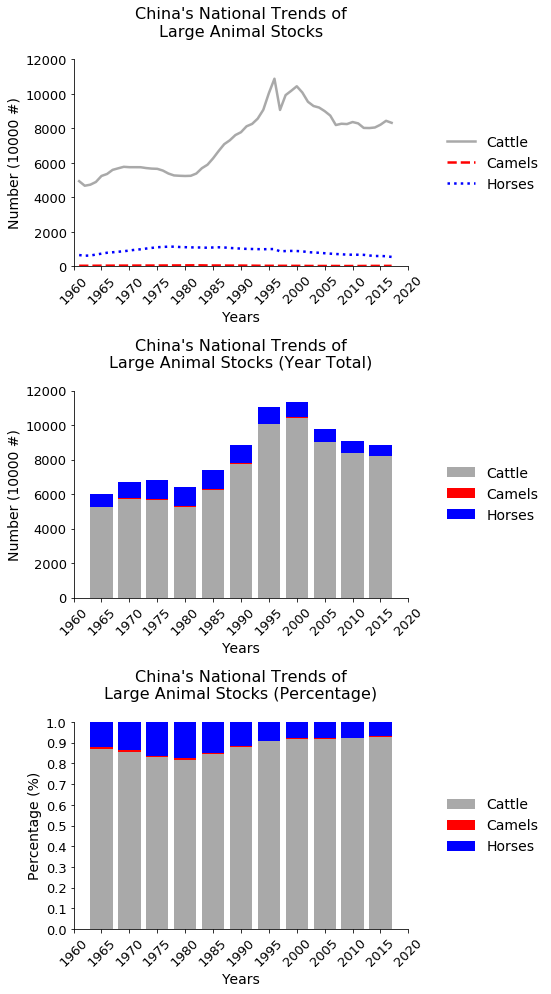

In [19]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Large Animal Stocks'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = lrg_st
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = st[st['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

# ------------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_num(ax0, range(0, 14000, 2000))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_num(ax1, range(0, 14000, 2000))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2)

plt.show()

#### Pig, Goat and Sheep Stocks

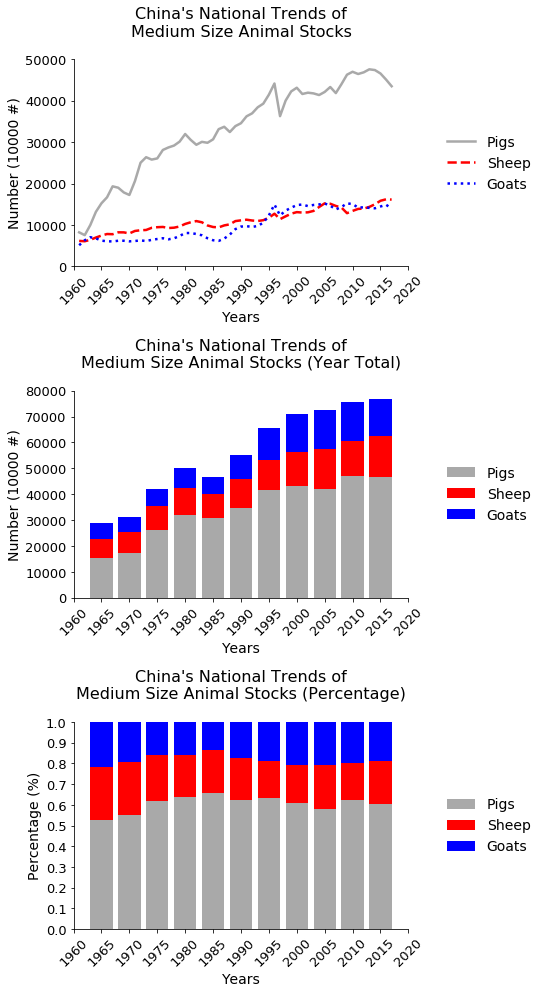

In [20]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Medium Size Animal Stocks'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = mid_st
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = st[st['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)
    
# -------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_num(ax0, range(0, 60000, 10000))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_num(ax1, range(0, 90000, 10000))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2)

plt.show()

#### Birds Stocks

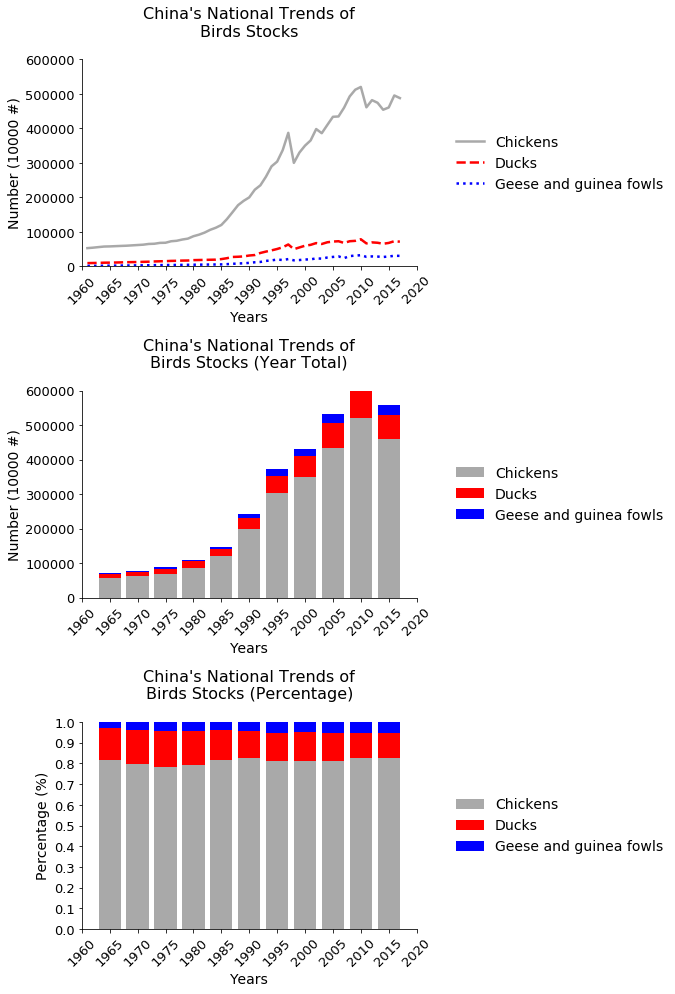

In [21]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Birds Stocks'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = brd_st
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = st[st['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)
    
# -------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_num(ax0, range(0, 700000, 100000))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_num(ax1, range(0, 700000, 100000))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2)

plt.show()

### Slaughtered Animals

In [22]:
lrg_mt=['Meat, cattle', 'Meat, camel', 'Meat, horse']
mid_mt=['Meat, pig', 'Meat, sheep', 'Meat, goat']
brd_mt=['Meat, chicken', 'Meat, duck', 'Meat, goose and guinea fowl']

sl=lvs_fao_cn[(lvs_fao_cn['Element']=='Producing Animals/Slaughtered')][['Year','Item','Value']]

#### Slaughtered Large Animals

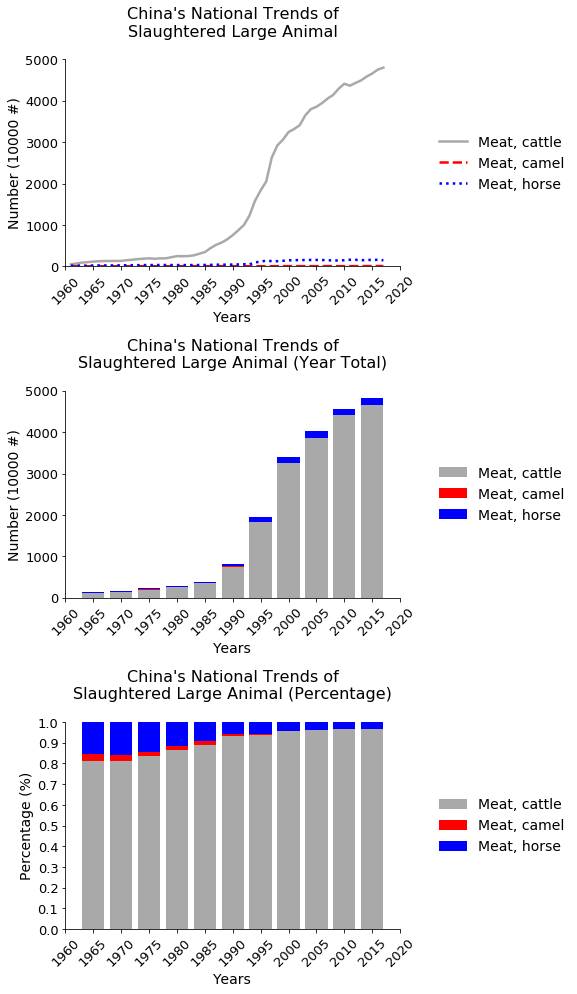

In [23]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Slaughtered Large Animal'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = lrg_mt
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = sl[sl['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

    
# -------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_num(ax0, range(0, 6000, 1000))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_num(ax1, range(0, 6000, 1000))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2)

plt.show()

#### Slaughtered Medium Size Animals

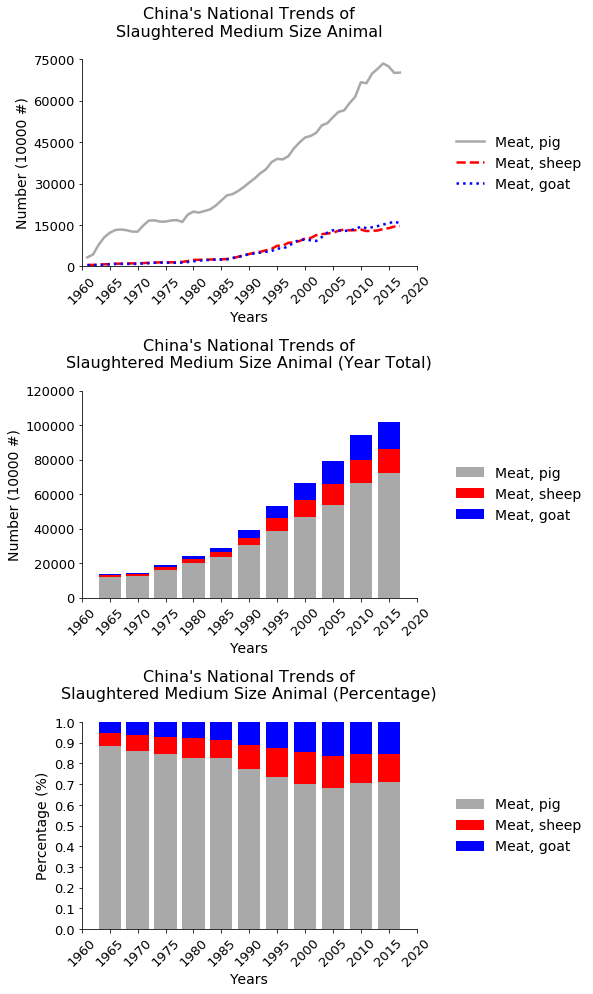

In [24]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Slaughtered Medium Size Animal'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = mid_mt
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = sl[sl['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)
    
# -------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_num(ax0, range(0, 90000, 15000))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_num(ax1, range(0, 140000, 20000))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2)

plt.show()

#### Slaughtered Birds

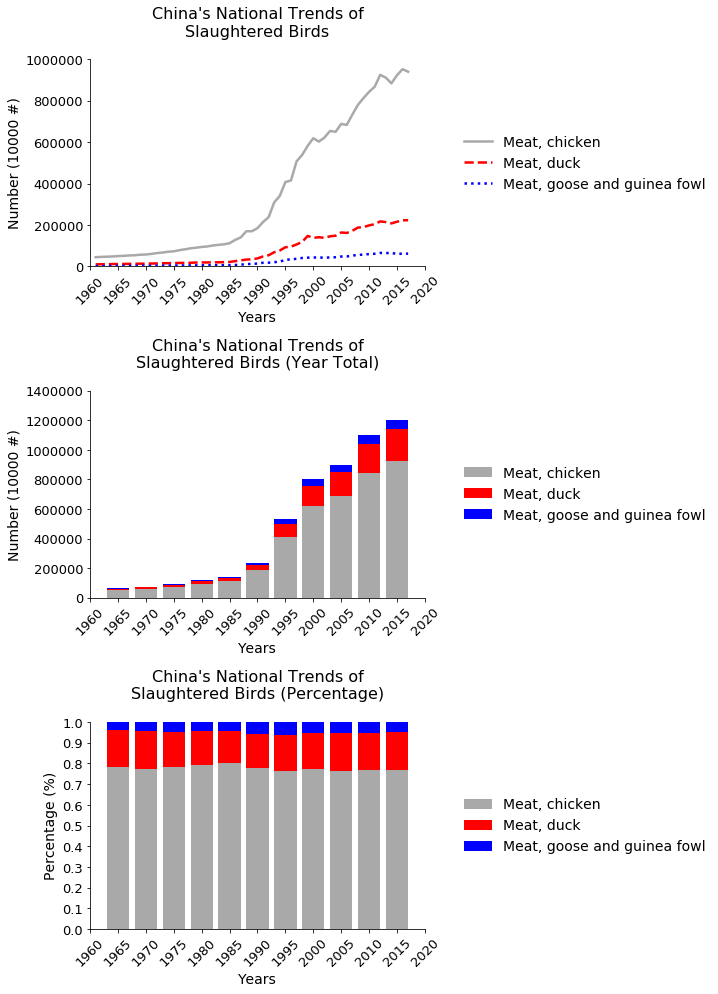

In [25]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Slaughtered Birds'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = brd_mt
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = sl[sl['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)
# -------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_num(ax0, range(0, 1200000, 200000))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_num(ax1, range(0, 1600000, 200000))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2)

plt.show()

### Production of Animal Products

After Exploring the Stocks and Slaughtered animals, we know that the main kinds of animals for animal products include: Cattles, Goats, Sheep, Pigs, Chickens, and ducks, because The sum of the number of these animal stocks or the number of slaughters exceeds 90% of those of the equivalent body size.

So, the main kind of animal production should include: meat of cattle, meat of goat, meat of sheep, meat of pig, meat of chicken, and meat of duck, egg from hen and other birds, and cow milk.

In [26]:
meat_pr = ['Meat, cattle', 'Meat, sheep', 'Meat, goat', 'Meat, pig', 'Meat, chicken', 'Meat, duck']
egg_mlk=['Eggs, hen, in shell', 'Eggs, other bird, in shell','Milk, whole fresh cow']

prod = lvs_fao_cn[(lvs_fao_cn['Element']=='Production')][['Year','Item','Value']]

#### Productions of Animal Meat

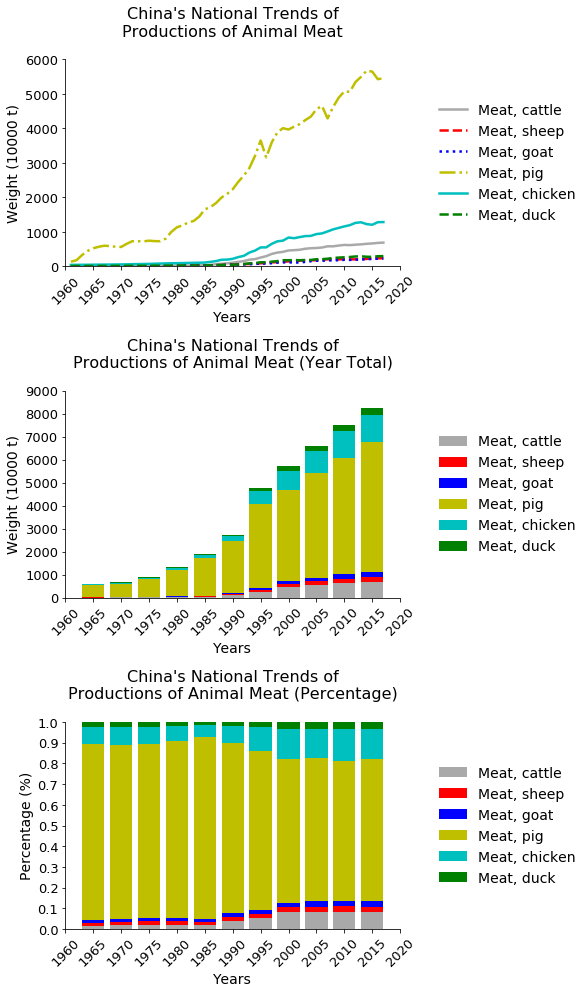

In [27]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Productions of Animal Meat'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = meat_pr
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = prod[prod['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)
# -------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_wei(ax0, range(0, 7000, 1000))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_wei(ax1, range(0, 10000, 1000))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2)

plt.show()

#### Production of Birds Egg and Cow Milk

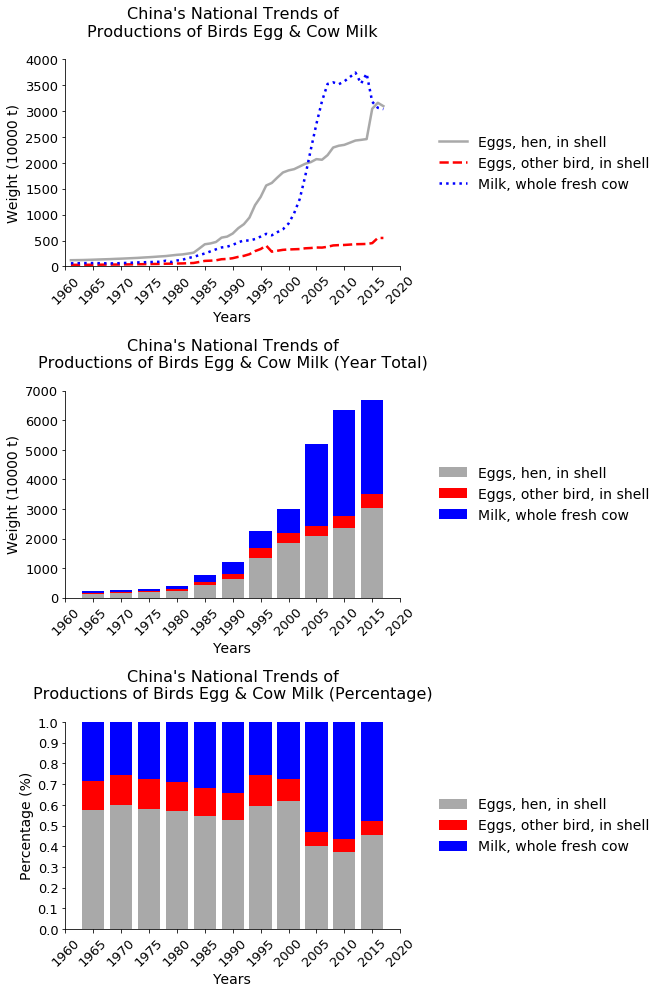

In [28]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Productions of Birds Egg & Cow Milk'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = egg_mlk
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = prod[prod['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)
# -------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_wei(ax0, range(0, 4500, 500))


ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_wei(ax1, range(0, 8000, 1000))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2)

plt.show()

## Clean Data Further

In [29]:
stocks = ['Cattle', 'Goats', 'Sheep', 'Pigs', 'Chickens', 'Ducks']
meat=['Meat, cattle', 'Meat, goat', 'Meat, sheep', 'Meat, pig', 'Meat, chicken', 'Meat, duck']
egg_mlk=['Eggs, hen, in shell', 'Eggs, other bird, in shell', 'Milk, whole fresh cow']

lvs_fao_cn = lvs_fao_cn[lvs_fao_cn['Item'].isin(stocks+meat+egg_mlk)]

print("Shape of China's National Product Data of Livestocks after feature selecting:", lvs_fao_cn.shape)
display(lvs_fao_cn.groupby(['Element', 'Item']).count())

Shape of China's National Product Data of Livestocks after feature selecting: (1539, 7)


Area Code  Area  \
Element                       Item                                          
Producing Animals/Slaughtered Meat, cattle                       57    57   
                              Meat, chicken                      57    57   
                              Meat, duck                         57    57   
                              Meat, goat                         57    57   
                              Meat, pig                          57    57   
                              Meat, sheep                        57    57   
Production                    Eggs, hen, in shell                57    57   
                              Eggs, other bird, in shell         57    57   
                              Meat, cattle                       57    57   
                              Meat, chicken                      57    57   
                              Meat, duck                         57    57   
                              Meat, goat                         57    57   
                              Meat, pig                          57    57   
                              Meat, sheep                        57    57   
                              Milk, whole fresh cow              57    57   
Stocks                        Cattle                             57    57   
                              Chickens                           57    57   
                              Ducks                              57    57   
                              Goats                              57    57   
                              Pigs                               57    57   
                              Sheep                              57    57   
Yield/Carcass Weight          Meat, cattle                       57    57   
                              Meat, chicken                      57    57   
                              Meat, duck                         57    57   
                              Meat, goat                         57    57   
                              Meat, pig                          57    57   
                              Meat, sheep                        57    57   

                                                          Year  Unit  Value  
Element                       Item                                           
Producing Animals/Slaughtered Meat, cattle                  57    57     57  
                              Meat, chicken                 57    57     57  
                              Meat, duck                    57    57     57  
                              Meat, goat                    57    57     57  
                              Meat, pig                     57    57     57  
                              Meat, sheep                   57    57     57  
Production                    Eggs, hen, in shell           57    57     57  
                              Eggs, other bird, in shell    57    57     57  
                              Meat, cattle                  57    57     57  
                              Meat, chicken                 57    57     57  
                              Meat, duck                    57    57     57  
                              Meat, goat                    57    57     57  
                              Meat, pig                     57    57     57  
                              Meat, sheep                   57    57     57  
                              Milk, whole fresh cow         57    57     57  
Stocks                        Cattle                        57    57     57  
                              Chickens                      57    57     57  
                              Ducks                         57    57     57  
                              Goats                         57    57     57  
                              Pigs                          57    57     57  
                              Sheep                         57    57     57  
Yield/Carcass Weight          

Save data.

In [30]:
# Break Point - China's National Product Data of Livestocks after features selecting.
lvs_fao_cn.to_csv('./data/lvs_fao_cn_temp.csv', index=False)

# First Glance at Land Animal Productions in Different Areas of China

### Data Outline

In [31]:
lvs_cn_ars = pd.read_csv('.data/NBS/Production_Livestock.csv')

print('There are {} rows and {} columns in the data frame.\n'.format(lvs_cn_ars.shape[0],lvs_cn_ars.shape[1]))

items = lvs_cn_ars.columns.values.tolist()
print('Items list =', items, '\n')

areas = lvs_cn_ars['Area'].unique()
print('Areas list =',areas, '\n')

There are 642 rows and 30 columns in the data frame.

Items list = ['Area', 'Year', 'Stock, large animals', 'Stock, cattle', 'Stock, horse', 'Stock, donkey', 'Stock, mule', 'Stock, camel', 'Slaughtered, pig', 'Stock, pig', 'Stock, goat & sheep', 'Stock, goat', 'Stock, sheep', 'Slaughtered, cattle', 'Slaughtered, goat & sheep', 'Slaughtered, birds', 'Meat Production, livestocks', 'Meat Production, pig, cattle, goat & sheep', 'Meat Production, pig', 'Meat Production, cattle', 'Meat Production, goat & sheep', 'Milk Production, total', 'Milk Production, cow', 'Wool Production, sheep', 'Wool Production, sheep, fine', 'Wool Production, sheep, semi-fine', 'Wool Production, goat, thick', 'Wool Production, goat, cashmere', 'Egg Production, birds', 'Honey Production'] 

Areas list = ['China, mainland' 'Beijing' 'Tianjin' 'Hebei' 'Shanxi' 'Neimenggu'
 'Liaoning' 'Jilin' 'Heilongjiang' 'Shanghai' 'Jiangsu' 'Zhejiang' 'Anhui'
 'Fujian' 'Jiangxi' 'Shandong' 'Henan' 'Hubei' 'Hunan' 'Guangdong'
 'Guan

In [32]:
display(lvs_cn_ars.head())
display(lvs_cn_ars.tail())

,Area,Year,"Stock, large animals","Stock, cattle","Stock, horse","Stock, donkey","Stock, mule","Stock, camel","Slaughtered, pig","Stock, pig","Stock, goat & sheep","Stock, goat","Stock, sheep","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, birds","Meat Production, livestocks","Meat Production, pig, cattle, goat & sheep","Meat Production, pig","Meat Production, cattle","Meat Production, goat & sheep","Milk Production, total","Milk Production, cow","Wool Production, sheep","Wool Production, sheep, fine","Wool Production, sheep, semi-fine","Wool Production, goat, thick","Wool Production, goat, cashmere","Egg Production, birds",Honey Production
0,"China, mainland",1996,13360.60,11031.80,871.50,944.40,478.00,34.90,41225.10,36283.60,23728.3000,12315.8000,11412.500,NaN,NaN,NaN,4595.400000,3694.700000,3158.000000,355.700000,181.000000,735.800000,629.40000,298102.0,121020.0,74099.0,35255.0,9585.00,1965.200,18.4000
1,"China, mainland",1997,14541.80,12175.70,891.20,952.80,480.60,35.00,46483.70,40034.80,25575.7000,13480.1000,12091.900,NaN,NaN,NaN,5268.700000,4249.900000,3596.300000,440.900000,212.800000,681.100000,601.10000,255059.0,116054.0,55683.0,25865.0,8626.00,1895.300,21.1000
2,"China, mainland",1998,14803.20,12441.90,898.10,955.80,473.90,33.50,50215.10,42256.30,26903.5000,14168.3000,12735.200,NaN,NaN,NaN,5723.800000,4598.200000,3883.700000,479.900000,234.600000,745.400000,662.90000,277545.0,115752.0,68775.0,31417.0,9799.00,2021.300,20.7000
3,"China, mainland",1999,15024.75,12698.34,891.41,934.77,467.27,32.96,51977.20,43144.20,27925.7700,14816.2600,13109.500,NaN,NaN,NaN,5949.000000,4762.300000,4005.600000,505.429400,251.264300,806.907300,717.59390,283152.0,114103.0,73700.0,31849.0,10179.65,2134.667,22.9907
4,"China, mainland",2000,15151.51,12866.34,876.58,922.73,453.03,32.62,52673.34,44681.54,29031.9007,15715.9277,13315.983,NaN,NaN,NaN,6125.353545,4838.193106,4031.429225,532.805585,273.958296,919.118908,827.43079,292502.0,117386.0,84921.0,33266.0,11057.00,2243.300,24.6000


,Area,Year,"Stock, large animals","Stock, cattle","Stock, horse","Stock, donkey","Stock, mule","Stock, camel","Slaughtered, pig","Stock, pig","Stock, goat & sheep","Stock, goat","Stock, sheep","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, birds","Meat Production, livestocks","Meat Production, pig, cattle, goat & sheep","Meat Production, pig","Meat Production, cattle","Meat Production, goat & sheep","Milk Production, total","Milk Production, cow","Wool Production, sheep","Wool Production, sheep, fine","Wool Production, sheep, semi-fine","Wool Production, goat, thick","Wool Production, goat, cashmere","Egg Production, birds",Honey Production
637,Shaanxi,2017,154.506320,151.232020,0.223300,2.696100,0.354900,NaN,1141.013664,854.423760,868.520960,712.042445,156.478514,NaN,NaN,NaN,113.408806,103.967187,85.834229,8.332958,9.800000,156.934486,107.275087,3107.6000,1086.300000,1704.800000,1744.000000,1492.530000,60.082440,0.564721
638,Gansu,2017,491.202548,424.311515,11.850000,36.547455,15.787996,2.705582,682.730000,551.320000,1839.887280,398.305630,1441.581650,NaN,NaN,NaN,99.137925,93.601000,49.882000,20.961000,22.758000,41.044634,40.400000,27529.6334,8095.108208,5667.738537,1898.346733,455.472552,13.830500,0.220168
639,Qinghai,2017,559.250000,546.560000,11.100000,0.450000,0.220000,0.920000,110.630000,82.680000,1387.410000,180.030000,1207.380000,NaN,NaN,NaN,35.303700,34.210000,8.670000,12.860000,12.680000,33.190841,32.427941,17834.0000,2070.000000,6146.000000,844.000000,411.000000,2.460000,0.152900
640,Ningxia,2017,123.076900,118.333400,0.139100,4.167000,0.398200,0.039200,113.745445,81.035057,506.589363,99.778601,406.810763,NaN,NaN,NaN,33.462630,29.731899,8.907976,10.917891,9.906033,160.065904,160.065904,10898.0000,3801.000000,3058.000000,835.000000,609.000000,15.271177,0.110100
641,Xinjiang,2017,534.260544,432.988327,68.606966,20.819051,0.146200,11.700000,495.765348,342.682280,4317.919646,572.140657,3745.778989,NaN,NaN,NaN,159.852963,137.083871,35.802410,43.040014,58.241447,200.306337,191.860000,105945.7400,15627.190000,17282.430000,3070.770000,1125.480000,37.373828,0.942563


## Dealing with Missing Values 

### Check Missing Values

Print all the columns with missing values (length of which shorter than data frame's length).

In [33]:
# mask missing data with 'True'

df_null = lvs_cn_ars.isnull()
# print(df_null.head())

# Find the columns where missing values exist
null_counts = {}
for column in lvs_cn_ars.columns.tolist():    
    null_count = df_null.groupby([column]).size()[False]
    if null_count < lvs_cn_ars.shape[0]: null_counts[column] = null_count
display(null_counts)

{'Stock, horse': 561,
 'Stock, donkey': 529,
 'Stock, mule': 529,
 'Stock, camel': 158,
 'Stock, sheep': 544,
 'Slaughtered, cattle': 558,
 'Slaughtered, goat & sheep': 558,
 'Slaughtered, birds': 558,
 'Meat Production, cattle': 633,
 'Wool Production, sheep': 540,
 'Wool Production, sheep, fine': 484,
 'Wool Production, sheep, semi-fine': 504,
 'Wool Production, goat, thick': 559,
 'Wool Production, goat, cashmere': 426,
 'Honey Production': 601}

### Missing Value Explanation and Cleaning
**1. Except 'Slaughtered, cattle', 'Slaughtered, goat & sheep', 'Slaughtered, birds', the missing values in other columns because they are too small, replace them with zeros.**

In [34]:
columns = lvs_cn_ars.columns.tolist()

items = ['Slaughtered, cattle', 'Slaughtered, goat & sheep', 'Slaughtered, birds']

for i in items:
    columns.remove(i)

lvs_cn_ars[columns] = lvs_cn_ars[columns].fillna(0)
display(lvs_cn_ars[columns].describe(include='all'))

,Area,Year,"Stock, large animals","Stock, cattle","Stock, horse","Stock, donkey","Stock, mule","Stock, camel","Slaughtered, pig","Stock, pig","Stock, goat & sheep","Stock, goat","Stock, sheep","Meat Production, livestocks","Meat Production, pig, cattle, goat & sheep","Meat Production, pig","Meat Production, cattle","Meat Production, goat & sheep","Milk Production, total","Milk Production, cow","Wool Production, sheep","Wool Production, sheep, fine","Wool Production, sheep, semi-fine","Wool Production, goat, thick","Wool Production, goat, cashmere","Egg Production, birds",Honey Production
count,642,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000
unique,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,"China, mainland",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.465732,848.011590,737.702808,44.209491,44.440794,19.939555,1.876654,4059.385176,2972.681655,1958.653915,998.122278,960.496308,480.651699,374.255005,311.119221,39.552913,24.014330,168.170416,160.284607,23574.031009,8111.313219,7217.599774,2410.425487,994.260982,172.277924,2.324778
std,NaN,5.794417,2262.837114,1961.245434,123.495124,128.605836,60.566196,5.960201,11024.658981,8016.222970,5317.102928,2693.511266,2700.268734,1302.679340,1012.701967,845.836364,104.787724,66.308076,480.472562,460.266432,66989.492238,23963.642050,20118.954097,6589.101800,2916.484640,472.688429,6.725113
min,NaN,1996.000000,1.230000,1.230000,0.000000,0.000000,0.000000,0.000000,12.600000,21.300000,10.960444,4.220000,0.000000,12.474500,6.593500,0.700000,0.000000,0.226204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000
25%,NaN,2002.000000,123.272883,111.035000,0.224125,0.192500,0.160025,0.000000,563.812500,440.447977,175.540000,101.250000,1.107500,78.780294,67.682812,43.037434,5.300650,2.604375,13.412500,12.945695,14.132500,0.000000,3.667750,10.000000,0.000000,16.200000,0.200000
50%,NaN,2007.000000,454.940000,383.810000,4.482750,6.965000,2.405000,0.000000,1755.232400,1339.595857,591.050000,350.651824,114.147458,204.943600,159.299054,134.565675,13.070000,7.157926,32.705550,30.140000,3316.000000,336.065000,1148.045000,405.500000,34.700000,41.192050,0.638234
75%,NaN,2012.000000,627.283775,541.169372,40.230000,32.250000,13.425000,0.000000,3180.377500,2302.897361,1571.323575,663.757500,612.221085,388.876611,276.557132,245.629224,33.137062,15.630000,92.162369,83.444800,14979.347500,3565.500000,5200.750000,1708.750000,769.551400,119.949500,1.273110


**2. Between 1999 and the newest year, the national total of 'Out_cattle', 'Out_gt_shp', 'Out_poultry' can be caculated by adding up the provices data.**

In [35]:
year_newest = np.array(lvs_cn_ars['Year'].unique()).max()
years = range(1999, year_newest)
areas = lvs_cn_ars['Area'].unique().tolist()

areas.remove('China, mainland')
print(areas)

def cn_total(item):
    for year in years:
        total = lvs_cn_ars[(lvs_cn_ars['Year']==year) & (lvs_cn_ars['Area'].isin(areas))][item].sum()
        lvs_cn_ars.loc[(lvs_cn_ars['Year']==year) & (lvs_cn_ars['Area']=='China, mainland'), item] = total
        
items = ['Slaughtered, cattle', 'Slaughtered, goat & sheep', 'Slaughtered, birds']
for i in items:
    cn_total(i)

display(lvs_cn_ars[['Area', 'Year']+items][(lvs_cn_ars['Area']=='China, mainland')].head())

['Beijing', 'Tianjin', 'Hebei', 'Shanxi', 'Neimenggu', 'Liaoning', 'Jilin', 'Heilongjiang', 'Shanghai', 'Jiangsu', 'Zhejiang', 'Anhui', 'Fujian', 'Jiangxi', 'Shandong', 'Henan', 'Hubei', 'Hunan', 'Guangdong', 'Guangxi', 'Hainan', 'Chongqing', 'Sichuan', 'Guizhou', 'Yunnan', 'Xizang', 'Shaanxi', 'Gansu', 'Qinghai', 'Ningxia', 'Xinjiang']


,Area,Year,"Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, birds"
0,"China, mainland",1996,NaN,NaN,NaN
1,"China, mainland",1997,NaN,NaN,NaN
2,"China, mainland",1998,NaN,NaN,NaN
3,"China, mainland",1999,3766.19,18820.35,743165.05
4,"China, mainland",2000,3964.81,20472.69,809857.07


**3. Before 1999 or in the newest year, the missing values in 'Out_cattle', 'Out_gt_shp', 'Out_poultry' because of the lacking of statistics , just leave them as NaN.**

In [36]:
# Break Point - China's Areas Product Data of Livestocks after dealingg with missing value.
lvs_cn_ars.to_csv('./data/lvs_cn_ars_temp.csv', index=False)

## Data Selection

After exploring China's national animal production data above, we know that the main items for exploring animal food production should include: 

- Stocks of cattle, goats & sheep, pigs;
- Slautered cattle, goats & sheep, pigs, birds;
- Production of meat of cattle, goat & sheep, pig. 
- Production of birds eggs and cow milk.

In [37]:
lvs_cn_ars = pd.read_csv('./data/lvs_cn_ars_temp.csv')

lvs_cn_ars = lvs_cn_ars[['Area', 'Year', 
         'Stock, cattle', 'Stock, goat & sheep', 'Stock, pig', 
         'Slaughtered, cattle', 'Slaughtered, goat & sheep', 'Slaughtered, pig', 'Slaughtered, birds',
         'Meat Production, cattle', 'Meat Production, goat & sheep', 'Meat Production, pig',
         'Egg Production, birds', 'Milk Production, cow']]
display(lvs_cn_ars.head())

,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Egg Production, birds","Milk Production, cow"
0,"China, mainland",1996,11031.80,23728.3000,36283.60,NaN,NaN,41225.10,NaN,355.700000,181.000000,3158.000000,1965.200,629.40000
1,"China, mainland",1997,12175.70,25575.7000,40034.80,NaN,NaN,46483.70,NaN,440.900000,212.800000,3596.300000,1895.300,601.10000
2,"China, mainland",1998,12441.90,26903.5000,42256.30,NaN,NaN,50215.10,NaN,479.900000,234.600000,3883.700000,2021.300,662.90000
3,"China, mainland",1999,12698.34,27925.7700,43144.20,3766.19,18820.35,51977.20,743165.05,505.429400,251.264300,4005.600000,2134.667,717.59390
4,"China, mainland",2000,12866.34,29031.9007,44681.54,3964.81,20472.69,52673.34,809857.07,532.805585,273.958296,4031.429225,2243.300,827.43079


In [38]:
# Break Point - China's Areas Product Data of Livestocks after features selection.
lvs_cn_ars.to_csv('./data/lvs_cn_ars_temp.csv', index=False)

# First Glance at Aquatic Productions in Different Areas of China

### Data Outline

In [40]:
aqu_raw = pd.read_csv('./data/NBS/Production_Fish.csv')

print('There are {} rows and {} columns in the data frame.\n'.format(aqu_raw.shape[0],aqu_raw.shape[1]))

feilds = aqu_raw.columns.values.tolist()
print('Fields list =', feilds, '\n')

areas = aqu_raw['Area'].unique()
print('Areas list =',areas, '\n')

There are 675 rows and 18 columns in the data frame.

Fields list = ['Area', 'Year', 'Aquatic, total', 'Marine, total', 'Marine, capture', 'Marine, aquac.', 'Marine Fish', 'Marine Crustaceans', 'Marine Molluscs', 'Marine Plants', 'Marine, others', 'Freshwater, total', 'Freshwater, capture', 'Freshwater, aquac.', 'Freshwater Fish', 'Freshwater Crustaceans', 'Freshwater Molluscs', 'Freshwater, others'] 

Areas list = ['CNFC' 'China, mainland' 'Beijing' 'Tianjin' 'Hebei' 'Shanxi' 'Neimenggu'
 'Liaoning' 'Jilin' 'Heilongjiang' 'Shanghai' 'Jiangsu' 'Zhejiang' 'Anhui'
 'Fujian' 'Jiangxi' 'Shandong' 'Henan' 'Hubei' 'Hunan' 'Guangdong'
 'Guangxi' 'Hainan' 'Chongqing' 'Sichuan' 'Guizhou' 'Yunnan' 'Xizang'
 'Shaanxi' 'Gansu' 'Qinghai' 'Ningxia' 'Xinjiang'] 



In [41]:
display(aqu_raw.head())
display(aqu_raw.tail())

,Area,Year,"Aquatic, total","Marine, total","Marine, capture","Marine, aquac.",Marine Fish,Marine Crustaceans,Marine Molluscs,Marine Plants,"Marine, others","Freshwater, total","Freshwater, capture","Freshwater, aquac.",Freshwater Fish,Freshwater Crustaceans,Freshwater Molluscs,"Freshwater, others"
0,CNFC,1998,27.4100,27.4100,27.4100,0.0,25.1100,0.2000,0.1000,0.0,2.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CNFC,1999,18.3000,18.3000,18.3000,0.0,9.5100,0.3200,8.4700,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CNFC,2000,17.5823,17.5823,17.5823,0.0,7.7602,0.2194,9.6027,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CNFC,2001,18.2977,18.2977,18.2977,0.0,8.9539,0.2250,9.1188,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CNFC,2002,18.2177,18.2177,18.2177,NaN,9.6000,0.1000,NaN,NaN,8.4604,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Area,Year,"Aquatic, total","Marine, total","Marine, capture","Marine, aquac.",Marine Fish,Marine Crustaceans,Marine Molluscs,Marine Plants,"Marine, others","Freshwater, total","Freshwater, capture","Freshwater, aquac.",Freshwater Fish,Freshwater Crustaceans,Freshwater Molluscs,"Freshwater, others"
670,Shaanxi,2017,16.3030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.3030,0.7200,15.5830,15.6488,0.0397,0.0008,0.6137
671,Gansu,2017,1.5441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5441,NaN,1.5441,1.5355,0.0063,NaN,0.0023
672,Qinghai,2017,1.6073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6073,NaN,1.6073,1.5959,0.0114,NaN,NaN
673,Ningxia,2017,18.0889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0889,0.0429,18.0460,17.9409,0.1450,NaN,0.0030
674,Xinjiang,2017,16.5528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.5528,1.2723,15.2805,16.2333,0.2988,0.0065,0.0142


## Dealing with Missing Values 
### Check Missing Values

Print all the columns with missing values (length of which shorter than data frame's length).

In [42]:
# mask missing data with 'True'

df_null = aqu_raw.isnull()
# print(df_null.head())

# Find the columns where missing values exist
null_counts = {}
for column in aqu_raw.columns.tolist():    
    null_count = df_null.groupby([column]).size()[False]
    if null_count < aqu_raw.shape[0]: 
        null_counts[column] = null_count
print(null_counts)

{'Aquatic, total': 668, 'Marine, total': 357, 'Marine, capture': 372, 'Marine, aquac.': 338, 'Marine Fish': 370, 'Marine Crustaceans': 357, 'Marine Molluscs': 347, 'Marine Plants': 298, 'Marine, others': 356, 'Freshwater, total': 656, 'Freshwater, capture': 610, 'Freshwater, aquac.': 650, 'Freshwater Fish': 648, 'Freshwater Crustaceans': 581, 'Freshwater Molluscs': 472, 'Freshwater, others': 530}


### Missing Value Explanation and Cleaning
**All the missing values in the data frame because they are too small, replace them with zeros.**

In [43]:
columns = list(null_counts.keys())

aqu_raw[columns] = aqu_raw[columns].fillna(0)
display(aqu_raw[columns].describe(include='all'))

,"Aquatic, total","Marine, total","Marine, capture","Marine, aquac.",Marine Fish,Marine Crustaceans,Marine Molluscs,Marine Plants,"Marine, others","Freshwater, total","Freshwater, capture","Freshwater, aquac.",Freshwater Fish,Freshwater Crustaceans,Freshwater Molluscs,"Freshwater, others"
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,346.973871,189.088358,98.127970,90.958528,72.827924,21.910302,75.494327,10.478144,7.435813,157.933323,15.785764,142.271453,139.827072,12.279010,3.344386,2.688333
std,934.820322,519.508999,265.099175,264.830420,196.620161,59.745670,216.298751,31.202700,22.380124,431.659325,41.618231,392.304726,379.457989,38.752682,9.237450,8.319867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.736350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.347600,0.608250,7.502200,7.996400,0.059300,0.000000,0.000000
50%,48.086300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.147200,3.059700,31.400000,34.796200,0.730000,0.107200,0.230000
75%,310.750100,134.494750,66.248350,48.828850,42.684100,17.001000,47.114800,1.419550,4.994300,127.162650,11.231400,113.624150,120.213650,6.673300,3.199000,1.695750
max,6881.509000,3470.403800,1533.981100,2000.697300,1255.335000,396.094600,1481.419400,224.781400,176.098600,3430.848400,258.730700,3199.005500,2986.653100,335.854900,56.896100,75.191300


In [44]:
# Break Point - China's Areas Product Data of Aquatic after dealing with missing valuse.
aqu_raw.to_csv('./data/'+'aqu_raw'+'_temp.csv', index=False)

## Caculate Aquatic Animals Production
There is no need to use CNFC's (China National Fisheries Corporation) data which can be omited.

In [45]:
aqu=pd.read_csv('./data/'+'aqu_raw'+'_temp.csv')

aqu=aqu[~aqu['Area'].isin(['CNFC'])]
# display(aqu.head())

For exploring the production of aquatic meat, we should substract the algae production from the total aquatic production.

In [46]:
col_name = aqu.columns.tolist()
col_name.insert(col_name.index('Marine, total'),'Aquatic, animals')
aqu = aqu.reindex(columns=col_name)
aqu['Aquatic, animals'] = aqu['Aquatic, total']-aqu['Marine Plants']

In [47]:
display(aqu.head())

,Area,Year,"Aquatic, total","Aquatic, animals","Marine, total","Marine, capture","Marine, aquac.",Marine Fish,Marine Crustaceans,Marine Molluscs,Marine Plants,"Marine, others","Freshwater, total","Freshwater, capture","Freshwater, aquac.",Freshwater Fish,Freshwater Crustaceans,Freshwater Molluscs,"Freshwater, others"
20,"China, mainland",1978,465.50,439.60,359.80,314.50,45.30,256.40,50.70,26.80,25.90,0.0,105.70,29.50,76.20,99.70,3.70,2.30,0.0
21,"China, mainland",1980,449.70,423.53,325.71,281.30,44.41,234.12,42.05,23.37,26.17,0.0,123.99,33.97,90.02,116.35,5.14,2.50,0.0
22,"China, mainland",1985,705.15,677.86,419.74,348.51,71.23,274.53,70.62,47.30,27.29,0.0,285.41,47.64,237.77,276.48,5.54,3.39,0.0
23,"China, mainland",1986,823.60,800.30,475.40,389.60,85.80,309.40,76.90,65.80,23.30,0.0,348.20,53.80,294.40,336.40,6.20,5.60,0.0
24,"China, mainland",1987,955.40,931.70,548.20,438.20,110.00,351.60,84.00,88.90,23.70,0.0,407.20,60.00,347.20,393.80,8.10,5.30,0.0


In [48]:
# Break Point - China's Areas Product Data of Aquatic after features selection.
aqu.to_csv('./data/'+'aqu'+'_temp.csv', index=False)

# Data Checking and Merging

## Check the Similarity between the FAO's Data and Chinese Government's Data

### Change FAO data's structure to the structure which is the same as data from China' government.

In [49]:
def mkPivot_cn(df_):

    df_ = pd.pivot_table(df_,index=['Year'],columns=['Item'],values=['Value'])

    # the result's columns is a multi-index list consists of tuples, so flatten by the last element of each tuple.
    df_.columns.set_names([None, None], inplace=True)    # reset multi index name
    df_.columns = df_.columns.get_level_values(-1)
    df_.columns = list(map(str, df_.columns))

    # fix the columns order and name
    fixed_columns = [df_.columns[-1]] + list(df_.columns[:-1])
    df_ = df_[fixed_columns]
    
    return df_

In [50]:
lvs_fao_cn=pd.read_csv('./data/'+'lvs_fao_cn'+'_temp.csv')

st_cn=lvs_fao_cn[lvs_fao_cn['Element']=='Stocks']
sl_cn=lvs_fao_cn[lvs_fao_cn['Element']=='Producing Animals/Slaughtered']
pr_cn=lvs_fao_cn[lvs_fao_cn['Element']=='Production']
yd_cn=lvs_fao_cn[lvs_fao_cn['Element']=='Yield/Carcass Weight']

st_cn=mkPivot_cn(st_cn)
sl_cn=mkPivot_cn(sl_cn)
pr_cn=mkPivot_cn(pr_cn)
yd_cn=mkPivot_cn(yd_cn)

In [51]:
st_cn['Stock, goat & sheep'] = st_cn['Goats'] + st_cn['Sheep']
st_cn['Stock, birds'] = st_cn['Ducks'] + st_cn['Chickens']
st_cn=st_cn.drop(columns=['Chickens', 'Ducks', 'Goats', 'Sheep'])
st_cn = st_cn.rename(columns={'Cattle':'Stock, cattle', 'Pigs':'Stock, pig'})
st_cn = st_cn[['Stock, cattle','Stock, goat & sheep','Stock, pig','Stock, birds']]

sl_cn['Slaughtered, goat & sheep'] = sl_cn['Meat, sheep']+sl_cn['Meat, goat']
sl_cn['Slaughtered, birds'] = sl_cn['Meat, chicken']+sl_cn['Meat, duck']
sl_cn = sl_cn.drop(columns=['Meat, sheep', 'Meat, goat', 'Meat, chicken', 'Meat, duck'])
sl_cn = sl_cn.rename(columns={'Meat, cattle':'Slaughtered, cattle', 'Meat, pig':'Slaughtered, pig'})
sl_cn = sl_cn[['Slaughtered, cattle','Slaughtered, goat & sheep','Slaughtered, pig','Slaughtered, birds']]

pr_cn['Meat Production, goat & sheep'] = pr_cn['Meat, goat']+pr_cn['Meat, sheep']
pr_cn['Meat Production, birds'] = pr_cn['Meat, chicken']+pr_cn['Meat, duck']
pr_cn['Egg Production, birds'] = pr_cn['Eggs, hen, in shell']+pr_cn['Eggs, other bird, in shell']
pr_cn = pr_cn.drop(columns=['Meat, goat', 'Meat, sheep', 'Meat, chicken', 'Meat, duck','Eggs, hen, in shell','Eggs, other bird, in shell'])
pr_cn = pr_cn.rename(columns={'Milk, whole fresh cow':'Milk Production, cow', 'Meat, cattle':'Meat Production, cattle', 'Meat, pig':'Meat Production, pig'})
pr_cn = pr_cn[['Meat Production, cattle','Meat Production, goat & sheep', 'Meat Production, pig', 'Meat Production, birds','Egg Production, birds','Milk Production, cow']]

yd_cn['Meat Yield, goat & sheep']=pr_cn['Meat Production, goat & sheep']/sl_cn['Slaughtered, goat & sheep']*1000    # tonnes/An to kg/An
yd_cn['Meat Yield, birds']=pr_cn['Meat Production, birds']/sl_cn['Slaughtered, birds']*1000
yd_cn = yd_cn.drop(columns=['Meat, sheep','Meat, chicken','Meat, duck','Meat, goat'])
yd_cn = yd_cn.rename(columns={'Meat, cattle':'Meat Yield, cattle', 'Meat, pig':'Meat Yield, pig'})
yd_cn = yd_cn[['Meat Yield, cattle', 'Meat Yield, goat & sheep','Meat Yield, pig','Meat Yield, birds']]

lvs_fao_cn=st_cn.join(sl_cn)
lvs_fao_cn=lvs_fao_cn.join(pr_cn)
lvs_fao_cn=lvs_fao_cn.join(yd_cn)

lvs_fao_cn.reset_index(inplace=True)
col_name = lvs_fao_cn.columns.tolist()
col_name.insert(col_name.index('Year'),'Area')
lvs_fao_cn = lvs_fao_cn.reindex(columns=col_name)
lvs_fao_cn['Area'] = 'China, mainland'

display(lvs_fao_cn.head())

,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Stock, birds","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Meat Production, birds","Egg Production, birds","Milk Production, cow","Meat Yield, cattle","Meat Yield, goat & sheep","Meat Yield, pig","Meat Yield, birds"
0,"China, mainland",1961,4940.0,11281.0,8227.0,62600.0,50.6,1000.0,3300.0,54500.0,4.3,10.0,137.0,57.00,150.0,60.0,85.0,10.000000,41.5,1.045872
1,"China, mainland",1962,4676.0,12387.0,7552.0,64200.0,69.0,1000.0,4300.0,56400.0,6.2,10.0,178.0,59.00,152.0,62.0,89.9,10.000000,41.4,1.046099
2,"China, mainland",1963,4736.0,13465.0,9997.0,66300.0,92.5,1200.0,7800.0,58000.0,8.3,12.0,330.0,60.75,154.0,63.5,89.7,10.000000,42.3,1.047414
3,"China, mainland",1964,4894.0,13747.0,13180.0,68400.0,103.5,1400.0,10500.0,59400.0,9.3,14.0,450.0,62.25,158.0,64.0,89.9,10.000000,42.9,1.047980
4,"China, mainland",1965,5242.0,13669.0,15247.0,69000.0,116.0,1570.0,12167.0,61600.0,10.4,16.0,525.0,64.50,162.0,64.5,89.7,10.191083,43.1,1.047078


In [52]:
lvs_fao_cn.to_csv('./data/'+'lvs_fao_cn'+'_temp.csv', index = False)

## Redressing China's National Data and Merge Datas From FAO and China's Government

In [53]:
lvs_fao_cn=pd.read_csv('./data/'+'lvs_fao_cn'+'_temp.csv')
lvs_cn_ars=pd.read_csv('./data/'+'lvs_cn_ars'+'_temp.csv')

Check the years that covered with non-null values in Chinese government's data.

In [54]:
display(lvs_fao_cn.head())
display(lvs_cn_ars.head())

,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Stock, birds","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Meat Production, birds","Egg Production, birds","Milk Production, cow","Meat Yield, cattle","Meat Yield, goat & sheep","Meat Yield, pig","Meat Yield, birds"
0,"China, mainland",1961,4940.0,11281.0,8227.0,62600.0,50.6,1000.0,3300.0,54500.0,4.3,10.0,137.0,57.00,150.0,60.0,85.0,10.000000,41.5,1.045872
1,"China, mainland",1962,4676.0,12387.0,7552.0,64200.0,69.0,1000.0,4300.0,56400.0,6.2,10.0,178.0,59.00,152.0,62.0,89.9,10.000000,41.4,1.046099
2,"China, mainland",1963,4736.0,13465.0,9997.0,66300.0,92.5,1200.0,7800.0,58000.0,8.3,12.0,330.0,60.75,154.0,63.5,89.7,10.000000,42.3,1.047414
3,"China, mainland",1964,4894.0,13747.0,13180.0,68400.0,103.5,1400.0,10500.0,59400.0,9.3,14.0,450.0,62.25,158.0,64.0,89.9,10.000000,42.9,1.047980
4,"China, mainland",1965,5242.0,13669.0,15247.0,69000.0,116.0,1570.0,12167.0,61600.0,10.4,16.0,525.0,64.50,162.0,64.5,89.7,10.191083,43.1,1.047078


,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Egg Production, birds","Milk Production, cow"
0,"China, mainland",1996,11031.80,23728.3000,36283.60,NaN,NaN,41225.10,NaN,355.700000,181.000000,3158.000000,1965.200,629.40000
1,"China, mainland",1997,12175.70,25575.7000,40034.80,NaN,NaN,46483.70,NaN,440.900000,212.800000,3596.300000,1895.300,601.10000
2,"China, mainland",1998,12441.90,26903.5000,42256.30,NaN,NaN,50215.10,NaN,479.900000,234.600000,3883.700000,2021.300,662.90000
3,"China, mainland",1999,12698.34,27925.7700,43144.20,3766.19,18820.35,51977.20,743165.05,505.429400,251.264300,4005.600000,2134.667,717.59390
4,"China, mainland",2000,12866.34,29031.9007,44681.54,3964.81,20472.69,52673.34,809857.07,532.805585,273.958296,4031.429225,2243.300,827.43079


In [55]:
lvs_cn_cn = lvs_cn_ars[lvs_cn_ars['Area']=='China, mainland']
cols=lvs_cn_cn.columns.tolist()
years=lvs_cn_cn['Year'].tolist()

for col in cols:
    years_not_nan = np.array([])
    for y in years:
        if lvs_cn_cn[lvs_cn_cn['Year']==y][col].isnull().values[0]: pass
        else: years_not_nan=np.append(years_not_nan, str(y))
    print("Years of non-null value in '{}': {}".format(col, ', '.join(years_not_nan)))

Years of non-null value in 'Area': 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017
Years of non-null value in 'Year': 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017
Years of non-null value in 'Stock, cattle': 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017
Years of non-null value in 'Stock, goat & sheep': 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017
Years of non-null value in 'Stock, pig': 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017
Years of non-null value in 'Slaughtered, cattle': 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 

**Conclusion:** The fully recorded data in China's Areas Data of 'China' is from 1999 to 2016.

### Compare the similarity between FAO's and Chinese government's data from the same year of the same item.

In [56]:
years=range(1999,data_year+1)

# data from FAO
lvs_fao_cn_1999 = lvs_fao_cn[lvs_fao_cn['Year'].isin(years)]
lvs_fao_cn_1999.reset_index(inplace=True)
lvs_fao_cn_1999=lvs_fao_cn_1999.drop(columns=['index'])
display(lvs_fao_cn_1999.head())

# data from Chinese Government
lvs_cn_cn_1999 = lvs_cn_cn[lvs_cn_cn['Year'].isin(years)]
lvs_cn_cn_1999.reset_index(inplace=True)
lvs_cn_cn_1999=lvs_cn_cn_1999.drop(columns=['index'])
display(lvs_cn_cn_1999)

,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Stock, birds","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Meat Production, birds","Egg Production, birds","Milk Production, cow","Meat Yield, cattle","Meat Yield, goat & sheep","Meat Yield, pig","Meat Yield, birds"
0,"China, mainland",1999,10175.4,26903.5,42256.3,385000.0,3060.000,18820.4,44876.1984,729600.0,421.92,251.300,4005.60,927.60,2134.7,717.5939,137.9,13.352532,89.3,1.271382
1,"China, mainland",2000,10439.6,27925.8,43144.2,410000.0,3244.500,19787.2,46676.0800,757050.0,462.80,264.980,3965.99,1016.40,2182.0,827.4000,142.6,13.391485,85.0,1.342580
2,"China, mainland",2001,10077.4,27948.2,41633.6,427500.0,3316.815,19774.0,47237.4784,743850.0,470.80,268.215,4051.70,1003.08,2210.1,1025.5000,141.9,13.564023,85.8,1.348498
3,"China, mainland",2002,9540.8,27625.1,41950.5,465600.0,3409.380,20524.0,48377.3152,760100.0,483.30,280.020,4123.10,1028.90,2265.7,1299.8000,141.8,13.643539,85.2,1.353638
4,"China, mainland",2003,9295.4,28240.9,41776.2,451000.0,3646.730,22289.0,51050.5216,799700.0,512.10,304.630,4238.60,1064.80,2333.1,1746.3000,140.4,13.667280,83.0,1.331499


,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Egg Production, birds","Milk Production, cow"
0,"China, mainland",1999,12698.340000,27925.77000,43144.20000,3766.19,18820.35,51977.20000,743165.05,505.429400,251.264300,4005.600000,2134.667000,717.593900
1,"China, mainland",2000,12866.340000,29031.90070,44681.54000,3964.81,20472.69,52673.34000,809857.07,532.805585,273.958296,4031.429225,2243.300000,827.430790
2,"China, mainland",2001,12824.230000,29826.38000,45742.97000,4118.37,21722.45,54936.68000,808834.80,548.848436,292.683780,4184.476970,2336.727116,1025.455158
3,"China, mainland",2002,13084.773910,31655.18475,46291.46229,4401.12,23280.78,56684.30000,832894.09,584.607844,316.659378,4326.620730,2462.699342,1299.779402
4,"China, mainland",2003,13467.179050,34053.65503,46601.69180,4703.03,25958.28,59200.48764,888587.77,630.448090,357.243180,4518.610183,2606.725813,1746.280616
5,"China, mainland",2004,13781.822830,36639.12339,48189.06971,5018.90,28342.98,61800.69566,907021.77,675.871024,399.279134,4701.611405,2723.652309,2260.605825
6,"China, mainland",2005,10990.783100,29792.66832,43319.10612,5287.64,30804.54,60367.42350,986491.81,568.098800,350.060100,4555.327500,2438.120100,2753.372900
7,"China, mainland",2006,10503.059400,28337.61130,41854.43367,4222.06,24733.89,61208.98770,930548.28,590.332021,367.727146,4650.343031,2424.002796,2944.615111
8,"China, mainland",2007,10397.456900,28606.65299,43933.24774,4359.51,25570.71,56640.88919,957867.05,626.219166,385.679738,4307.851912,2546.704847,2947.094580
9,"China, mainland",2008,10067.973740,28823.72373,46433.11522,4446.08,26172.34,61278.91523,1022155.70,617.679854,393.242622,4682.016502,2699.619220,3010.565012


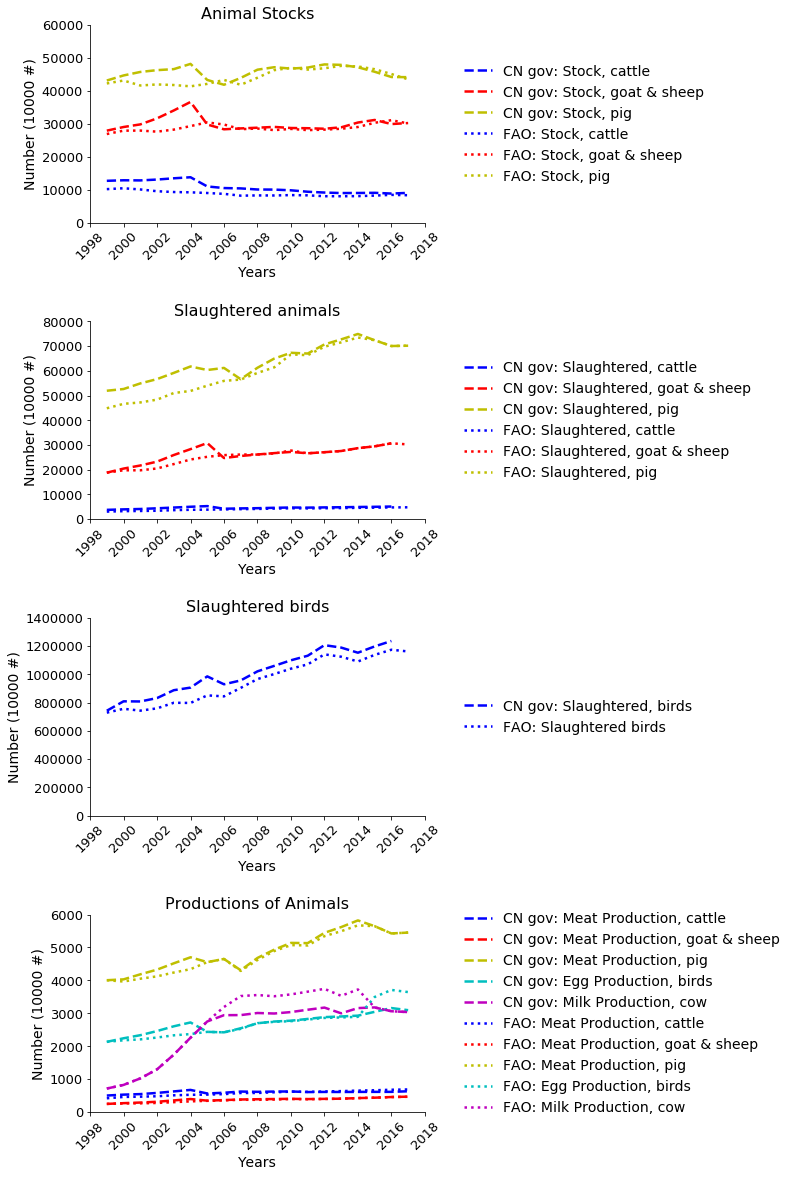

In [57]:
fig_size=(6,20)
fig = plt.figure(figsize = fig_size)
fig.tight_layout()                          
plt.subplots_adjust(wspace =0.3, hspace =0.5)

colors=('b','r','y','c','m','g')
ls1=('--','--','--','--','--','--','--') # gov
ls2=(':',':',':',':',':',':')            # fao

Xs = range(1998,2020,2)

def comparePlot(items):
    for i in range(0, len(items)):
        plt.plot(lvs_cn_cn_1999['Year'], lvs_cn_cn_1999[items[i]],c=colors[i],ls=ls1[i],lw=LIN_wei)
    for i in range(0, len(items)):
        plt.plot(lvs_fao_cn_1999['Year'], lvs_fao_cn_1999[items[i]],c=colors[i],ls=ls2[i],lw=LIN_wei)
    ax=plt.gca()
    setX_years(ax, Xs)
    setSpi_LB(ax)
#-------------------------------------------------------------------------------------------------
items = ('Stock, cattle','Stock, goat & sheep','Stock, pig')
ax0 = fig.add_subplot(4,1,1)
plt.title("Animal Stocks", fontsize=TIT_size)
comparePlot(items)
ax=plt.gca()
ax.legend(labels=['CN gov: Stock, cattle','CN gov: Stock, goat & sheep','CN gov: Stock, pig','FAO: Stock, cattle','FAO: Stock, goat & sheep','FAO: Stock, pig'],
          loc='center left', frameon=False, fontsize=LEG_size,
          bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)
setY_num(ax, range(0, 70000, 10000))

items = ('Slaughtered, cattle','Slaughtered, goat & sheep','Slaughtered, pig')
ax1 = fig.add_subplot(4,1,2)
plt.title("Slaughtered animals", fontsize=TIT_size)
comparePlot(items)
'Slaughtered, cattle','Slaughtered, goat & sheep','Slaughtered, pig'
ax=plt.gca()
ax.legend(labels=['CN gov: Slaughtered, cattle','CN gov: Slaughtered, goat & sheep','CN gov: Slaughtered, pig', 'FAO: Slaughtered, cattle','FAO: Slaughtered, goat & sheep','FAO: Slaughtered, pig'],
          loc='center left', frameon=False, fontsize=LEG_size,
          bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)
setY_num(ax, range(0, 90000, 10000))

ax2 = fig.add_subplot(4,1,3)
plt.title("Slaughtered birds", fontsize=TIT_size)
plt.plot(lvs_cn_cn_1999['Year'], lvs_cn_cn_1999['Slaughtered, birds'],c=colors[0],ls=ls1[0],lw=LIN_wei)
plt.plot(lvs_fao_cn_1999['Year'], lvs_fao_cn_1999['Slaughtered, birds'],c=colors[0],ls=ls2[0],lw=LIN_wei)
ax=plt.gca()
ax.legend(labels=['CN gov: Slaughtered, birds','FAO: Slaughtered birds'],
          loc='center left', frameon=False, fontsize=LEG_size,
          bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)
setSpi_LB(ax)
setX_years(ax, Xs)
setY_num(ax, range(0, 1600000, 200000))

items = ('Meat Production, cattle','Meat Production, goat & sheep','Meat Production, pig','Egg Production, birds','Milk Production, cow')
ax3 = fig.add_subplot(4,1,4)
plt.title("Productions of Animals", fontsize=TIT_size)
comparePlot(items)
ax=plt.gca()
ax.legend(labels=['CN gov: Meat Production, cattle','CN gov: Meat Production, goat & sheep','CN gov: Meat Production, pig','CN gov: Egg Production, birds','CN gov: Milk Production, cow',
                  'FAO: Meat Production, cattle','FAO: Meat Production, goat & sheep','FAO: Meat Production, pig','FAO: Egg Production, birds','FAO: Milk Production, cow'],
          loc='center left', frameon=False, fontsize=LEG_size,
          bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)
setY_num(ax, range(0, 7000, 1000))

plt.show()

Despite the milk data between 2005 and 2015 where the milk data from FAO is slightly higher then Chinese government, other datas are very close, and fluctuation are always happen in the same time , while FAO's data is more complete than Chinese government and has a better explanation, so we ues FAO's data as China's national data, as to different areas in China, we use Chinese government's data. 

### Merge Land Animals Datas from FAO and Chinese Government

Get the data from FAO from 1961 to 2017, and drop China's national data from Chinese government's data, and then merge the data.

In [58]:
df_fao= lvs_fao_cn[lvs_fao_cn['Year'].isin(range(1961,data_year+1))]
df_cn=lvs_cn_ars[~lvs_cn_ars['Area'].isin(['China, mainland'])]

df = pd.concat([df_fao, df_cn], join='outer', ignore_index=True, sort=False)
display(df.head())
display(df.tail())

,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Stock, birds","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Meat Production, birds","Egg Production, birds","Milk Production, cow","Meat Yield, cattle","Meat Yield, goat & sheep","Meat Yield, pig","Meat Yield, birds"
0,"China, mainland",1961,4940.0,11281.0,8227.0,62600.0,50.6,1000.0,3300.0,54500.0,4.3,10.0,137.0,57.00,150.0,60.0,85.0,10.000000,41.5,1.045872
1,"China, mainland",1962,4676.0,12387.0,7552.0,64200.0,69.0,1000.0,4300.0,56400.0,6.2,10.0,178.0,59.00,152.0,62.0,89.9,10.000000,41.4,1.046099
2,"China, mainland",1963,4736.0,13465.0,9997.0,66300.0,92.5,1200.0,7800.0,58000.0,8.3,12.0,330.0,60.75,154.0,63.5,89.7,10.000000,42.3,1.047414
3,"China, mainland",1964,4894.0,13747.0,13180.0,68400.0,103.5,1400.0,10500.0,59400.0,9.3,14.0,450.0,62.25,158.0,64.0,89.9,10.000000,42.9,1.047980
4,"China, mainland",1965,5242.0,13669.0,15247.0,69000.0,116.0,1570.0,12167.0,61600.0,10.4,16.0,525.0,64.50,162.0,64.5,89.7,10.191083,43.1,1.047078


,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Stock, birds","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Meat Production, birds","Egg Production, birds","Milk Production, cow","Meat Yield, cattle","Meat Yield, goat & sheep","Meat Yield, pig","Meat Yield, birds"
672,Shaanxi,2017,151.232020,868.520960,854.423760,NaN,NaN,NaN,1141.013664,NaN,8.332958,9.800000,85.834229,NaN,60.082440,107.275087,NaN,NaN,NaN,NaN
673,Gansu,2017,424.311515,1839.887280,551.320000,NaN,NaN,NaN,682.730000,NaN,20.961000,22.758000,49.882000,NaN,13.830500,40.400000,NaN,NaN,NaN,NaN
674,Qinghai,2017,546.560000,1387.410000,82.680000,NaN,NaN,NaN,110.630000,NaN,12.860000,12.680000,8.670000,NaN,2.460000,32.427941,NaN,NaN,NaN,NaN
675,Ningxia,2017,118.333400,506.589363,81.035057,NaN,NaN,NaN,113.745445,NaN,10.917891,9.906033,8.907976,NaN,15.271177,160.065904,NaN,NaN,NaN,NaN
676,Xinjiang,2017,432.988327,4317.919646,342.682280,NaN,NaN,NaN,495.765348,NaN,43.040014,58.241447,35.802410,NaN,37.373828,191.860000,NaN,NaN,NaN,NaN


In [59]:
df.to_csv('./data/'+'product'+'_temp.csv', index=False)

### Merge Aquatic Data to Land Animals' Data

In [60]:
aqu = pd.read_csv('./data/'+'aqu'+'_temp.csv')
df = pd.read_csv('./data/'+'product'+'_temp.csv')

df = pd.merge(df,aqu,how='outer',on=('Area','Year'))

print(df.shape)
display(df.head())
display(df.tail())

(677, 37)


,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Stock, birds","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Meat Production, birds","Egg Production, birds","Milk Production, cow","Meat Yield, cattle","Meat Yield, goat & sheep","Meat Yield, pig","Meat Yield, birds","Aquatic, total","Aquatic, animals","Marine, total","Marine, capture","Marine, aquac.",Marine Fish,Marine Crustaceans,Marine Molluscs,Marine Plants,"Marine, others","Freshwater, total","Freshwater, capture","Freshwater, aquac.",Freshwater Fish,Freshwater Crustaceans,Freshwater Molluscs,"Freshwater, others"
0,"China, mainland",1961,4940.0,11281.0,8227.0,62600.0,50.6,1000.0,3300.0,54500.0,4.3,10.0,137.0,57.00,150.0,60.0,85.0,10.000000,41.5,1.045872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"China, mainland",1962,4676.0,12387.0,7552.0,64200.0,69.0,1000.0,4300.0,56400.0,6.2,10.0,178.0,59.00,152.0,62.0,89.9,10.000000,41.4,1.046099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"China, mainland",1963,4736.0,13465.0,9997.0,66300.0,92.5,1200.0,7800.0,58000.0,8.3,12.0,330.0,60.75,154.0,63.5,89.7,10.000000,42.3,1.047414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"China, mainland",1964,4894.0,13747.0,13180.0,68400.0,103.5,1400.0,10500.0,59400.0,9.3,14.0,450.0,62.25,158.0,64.0,89.9,10.000000,42.9,1.047980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"China, mainland",1965,5242.0,13669.0,15247.0,69000.0,116.0,1570.0,12167.0,61600.0,10.4,16.0,525.0,64.50,162.0,64.5,89.7,10.191083,43.1,1.047078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Stock, birds","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Meat Production, birds","Egg Production, birds","Milk Production, cow","Meat Yield, cattle","Meat Yield, goat & sheep","Meat Yield, pig","Meat Yield, birds","Aquatic, total","Aquatic, animals","Marine, total","Marine, capture","Marine, aquac.",Marine Fish,Marine Crustaceans,Marine Molluscs,Marine Plants,"Marine, others","Freshwater, total","Freshwater, capture","Freshwater, aquac.",Freshwater Fish,Freshwater Crustaceans,Freshwater Molluscs,"Freshwater, others"
672,Shaanxi,2017,151.232020,868.520960,854.423760,NaN,NaN,NaN,1141.013664,NaN,8.332958,9.800000,85.834229,NaN,60.082440,107.275087,NaN,NaN,NaN,NaN,16.3030,16.3030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.3030,0.7200,15.5830,15.6488,0.0397,0.0008,0.6137
673,Gansu,2017,424.311515,1839.887280,551.320000,NaN,NaN,NaN,682.730000,NaN,20.961000,22.758000,49.882000,NaN,13.830500,40.400000,NaN,NaN,NaN,NaN,1.5441,1.5441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5441,0.0000,1.5441,1.5355,0.0063,0.0000,0.0023
674,Qinghai,2017,546.560000,1387.410000,82.680000,NaN,NaN,NaN,110.630000,NaN,12.860000,12.680000,8.670000,NaN,2.460000,32.427941,NaN,NaN,NaN,NaN,1.6073,1.6073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6073,0.0000,1.6073,1.5959,0.0114,0.0000,0.0000
675,Ningxia,2017,118.333400,506.589363,81.035057,NaN,NaN,NaN,113.745445,NaN,10.917891,9.906033,8.907976,NaN,15.271177,160.065904,NaN,NaN,NaN,NaN,18.0889,18.0889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0889,0.0429,18.0460,17.9409,0.1450,0.0000,0.0030
676,Xinjiang,2017,432.988327,4317.919646,342.682280,NaN,NaN,NaN,495.765348,NaN,43.040014,58.241447,35.802410,NaN,37.373828,191.860000,NaN,NaN,NaN,NaN,16.5528,16.5528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.5528,1.2723,15.2805,16.2333,0.2988,0.0065,0.0142


## Estimating Some Missing Values of Areas' Data

- **For cattle, goat & sheep, and pig Unit Meat Yilds in China's areas:**

    - *'Meat Yield, cattle' = 'Meat Production, cattle' / 'Slaughtered, cattle'*
    - *'Meat Yield, goat & sheep' = 'Meat Production, goat & sheep' / 'Slaughtered, goat & sheep'*
    - *'Meat Yield, pig' = 'Meat Production, pig' / 'Slaughtered, pig'*


- **For birds' unit meat yields, meat productions and stocks in China's Area:**

    - Birds Unit Meat Yilds in China's areas:

    Lacking of Meat 'Production, birds' and 'Slaughtered, birds', 'Meat Yield, birds' can be replaced with the national data in the same year.
    
    - Birds Stocks:
    
    *(each year's 'Slaughtered, birds' of cn / each year's 'Stock, birds' of cn) = ('Slaughtered, birds' in areas of same year / 'Stock, birds' in areas of same year)*
    
    - Birds Meat Productions:
    
    *'Meat Production, birds' = 'Meat Yield, birds' * 'Slaughtered, birds'*
    

In [61]:
# cattle, goat & sheep, pig
df.loc[~df['Area'].isin(['China, mainland']), 'Meat Yield, cattle'] = df['Meat Production, cattle']/df['Slaughtered, cattle']*1000 # 吨到千克
df.loc[~df['Area'].isin(['China, mainland']), 'Meat Yield, goat & sheep'] = df['Meat Production, goat & sheep']/df['Slaughtered, goat & sheep']*1000
df.loc[~df['Area'].isin(['China, mainland']), 'Meat Yield, pig'] = df['Meat Production, pig']/df['Slaughtered, pig']*1000 

# birds
Years = range(1999,data_year)
Areas = list(df['Area'].unique())
Areas.remove('China, mainland')
for y in Years:
    for area in Areas:
        # Birds Unit Meat Yilds in China's areas
        df.loc[(df['Area']==area) & (df['Year']==y), 'Meat Yield, birds'] \
        = df[(df['Area']=='China, mainland') & (df['Year']==2016)]['Meat Yield, birds'].values[0]
        # for Birds Stocks 
        df.loc[(df['Area']==area) & (df['Year']==y), 'St/Sl, birds, est']\
        = df[(df['Area']=='China, mainland') & (df['Year']==y)]['Stock, birds'].values[0]\
        / df[(df['Area']=='China, mainland') & (df['Year']==y)]['Slaughtered, birds'].values[0]
# Birds stock
df.loc[~df['Area'].isin(['China, mainland']), 'Stock, birds'] = df['St/Sl, birds, est'] * df['Slaughtered, birds']
# Birds Meat Productions
df.loc[~df['Area'].isin(['China, mainland']), 'Meat Production, birds'] = df['Slaughtered, birds'] * df['Meat Yield, birds'] * 10000 / 10000000 # 万只，千克到万吨

df.drop(columns=(['St/Sl, birds, est']), inplace=True)
display(df[df['Area']=='Beijing'].head())
display(df[df['Area']=='Beijing'].tail())
display(df.shape)

,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Stock, birds","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Meat Production, birds","Egg Production, birds","Milk Production, cow","Meat Yield, cattle","Meat Yield, goat & sheep","Meat Yield, pig","Meat Yield, birds","Aquatic, total","Aquatic, animals","Marine, total","Marine, capture","Marine, aquac.",Marine Fish,Marine Crustaceans,Marine Molluscs,Marine Plants,"Marine, others","Freshwater, total","Freshwater, capture","Freshwater, aquac.",Freshwater Fish,Freshwater Crustaceans,Freshwater Molluscs,"Freshwater, others"
57,Beijing,1998,12.50,95.80,254.500000,NaN,NaN,NaN,374.80000,NaN,2.1000,1.20000,27.9000,NaN,17.9000,22.7000,NaN,NaN,74.439701,NaN,7.6400,7.6400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.6400,0.0,7.6400,7.60000,0.03000,0.0,0.0
88,Beijing,1999,13.60,103.10,248.300000,5725.555784,13.50,88.20,400.90000,10850.30,2.4000,1.30000,28.6000,14.556703,15.8000,24.0000,177.777778,14.739229,71.339486,1.341595,7.5600,7.5600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.5600,0.0,7.5600,7.54000,0.02000,0.0,0.0
119,Beijing,2000,18.85,120.11,250.050000,7574.967307,17.27,103.93,415.61000,13986.90,3.2681,1.55895,29.0927,18.764748,16.0000,30.3312,189.235669,15.000000,70.000000,1.341595,7.5044,7.5044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.5044,0.0,7.5044,7.48594,0.01846,0.0,0.0
150,Beijing,2001,23.40,145.10,248.200000,10716.356322,22.90,201.20,453.10000,18646.46,4.0118,3.01750,31.1951,25.015989,15.5587,42.9004,175.187773,14.997515,68.848157,1.341595,7.4302,7.4302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.4302,0.0,7.4302,7.39700,0.03320,0.0,0.0
181,Beijing,2002,27.43,175.24,277.828661,10037.192980,26.81,263.88,483.18428,16385.89,4.9220,4.24420,33.8229,21.983220,15.2145,55.0805,183.588213,16.083826,70.000000,1.341595,7.4168,7.4168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.4168,0.0,7.4168,7.36760,0.00000,0.0,0.0


,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Stock, birds","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Meat Production, birds","Egg Production, birds","Milk Production, cow","Meat Yield, cattle","Meat Yield, goat & sheep","Meat Yield, pig","Meat Yield, birds","Aquatic, total","Aquatic, animals","Marine, total","Marine, capture","Marine, aquac.",Marine Fish,Marine Crustaceans,Marine Molluscs,Marine Plants,"Marine, others","Freshwater, total","Freshwater, capture","Freshwater, aquac.",Freshwater Fish,Freshwater Crustaceans,Freshwater Molluscs,"Freshwater, others"
522,Beijing,2013,20.3500,59.4700,189.2300,4112.070691,11.2,70.8,314.3900,8529.8,2.050000,1.193670,24.630000,11.443533,17.500000,61.460000,183.035714,16.859746,78.342186,1.341595,6.3611,6.3611,0.7008,0.7008,0.0,0.7008,0.0,0.0,0.0,0.0,5.6603,0.3691,5.2912,5.6359,0.0121,0.0,0.0123
553,Beijing,2014,19.6800,68.3500,179.6000,3593.193788,9.2,68.7,305.7600,7550.7,1.700000,1.170000,24.010000,10.129978,19.650000,59.480000,184.782609,17.030568,78.525641,1.341595,6.8184,6.8184,1.3222,1.3222,0.0,1.3222,0.0,0.0,0.0,0.0,5.4962,0.4091,5.0871,5.4577,0.0047,0.0,0.0338
584,Beijing,2015,17.4848,69.3511,165.6081,3104.117963,8.4,71.0,284.4164,6688.4,1.546100,1.195500,22.478200,8.973121,19.580000,57.215500,184.059524,16.838028,79.032714,1.341595,6.6147,6.6147,1.7000,1.7000,0.0,1.7000,0.0,0.0,0.0,0.0,4.9147,0.4104,4.5043,4.9065,0.0036,0.0,0.0046
615,Beijing,2016,16.1556,59.6194,165.3117,1878.096831,7.4,69.6,275.3386,3882.7,1.360064,1.164135,21.841667,5.209009,18.333386,45.695278,183.792432,16.726078,79.326571,1.341595,5.4288,5.4288,1.3514,1.3514,0.0,1.3514,0.0,0.0,0.0,0.0,4.0774,0.3351,3.7423,4.0519,0.0024,0.0,0.0231
646,Beijing,2017,12.8312,35.1815,112.1828,NaN,NaN,NaN,242.0685,NaN,1.474351,1.055821,19.218211,NaN,15.684737,37.421293,NaN,NaN,79.391623,NaN,4.5098,4.5098,0.9000,0.9000,0.0,0.9000,0.0,0.0,0.0,0.0,3.6098,0.3016,3.3082,3.6089,0.0005,0.0,0.0004


(677, 37)

## Save Clean Data and Delete Temp Data

In [62]:
df.to_csv('./data/hybrid/MeatProduction_clean.csv', index=False)

In [65]:
fls = os.listdir('./data/')
for f in fls:
    if 'temp' in f:
        os.remove('./data/'+f)